## Step:1 Reading and understanding data

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split ,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression ,Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# shape of dataset
df.shape

(1460, 81)

In [7]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step:2 Data Cleaning

In [9]:
# to check duplicates in dataset
df_copy = df.copy()

In [10]:
df_copy.drop_duplicates(subset='Id')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [11]:
df_copy.shape

# no duplicates in dataset

(1460, 81)

In [12]:
# Columns MSSubClass, OverallQual, OverallCond need to be converted to object type
# Column LotFrontage and MasVnrArea needs to be converted to numeric type.
## Convert three columns to 'object' type as mentioned above
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [13]:
# Convert two columns to 'numeric' type as mentioned above
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [14]:
## Check whether the data types of five columns have changed
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [15]:
# to check null values

for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col ,"feature with" ,np.round((df[col].isnull().sum())/(len(df[col])),2) ,"null values")
        
# observation:MiscFeature has all null values,poolqc ,Alley and fence feature has more percentage of null values hence 
# these features are dropped for further analysis
# id also not dropped for further analysis

LotFrontage feature with 0.18 null values
Alley feature with 0.94 null values
MasVnrType feature with 0.01 null values
MasVnrArea feature with 0.01 null values
BsmtQual feature with 0.03 null values
BsmtCond feature with 0.03 null values
BsmtExposure feature with 0.03 null values
BsmtFinType1 feature with 0.03 null values
BsmtFinType2 feature with 0.03 null values
Electrical feature with 0.0 null values
FireplaceQu feature with 0.47 null values
GarageType feature with 0.06 null values
GarageYrBlt feature with 0.06 null values
GarageFinish feature with 0.06 null values
GarageQual feature with 0.06 null values
GarageCond feature with 0.06 null values
PoolQC feature with 1.0 null values
Fence feature with 0.81 null values
MiscFeature feature with 0.96 null values


In [16]:
column_list1_drop = ["Id","PoolQC","Fence","MiscFeature","Alley","PoolArea"]
df.drop(column_list1_drop,axis=1,inplace=True)

In [17]:
df.shape

(1460, 75)

In [18]:
# na in categorical features replaced with none
null_with_meaning = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for i in null_with_meaning:
    df[i].fillna("none", inplace=True)

In [19]:
# to check null values

for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col ,"feature with" ,np.round((df[col].isnull().sum())/(len(df[col])),3) ,"null values")

LotFrontage feature with 0.177 null values
MasVnrArea feature with 0.005 null values
Electrical feature with 0.001 null values
GarageYrBlt feature with 0.055 null values


In [20]:
GarageYrBlt_value = df.GarageYrBlt.mode()
GarageYrBlt_value[0]
# most of year built on 2005 so replacing na values with 2005

2005.0

In [21]:
df.GarageYrBlt.fillna(GarageYrBlt_value[0],inplace=True)

In [22]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [23]:
df.LotFrontage.fillna(df.LotFrontage.median(),inplace=True)

In [24]:
# to check null values

for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col ,"feature with" ,np.round((df[col].isnull().sum())/(len(df[col])),3) ,"null values")

MasVnrArea feature with 0.005 null values
Electrical feature with 0.001 null values


In [25]:
df.shape

(1460, 75)

## Step 3:Data Visualization

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

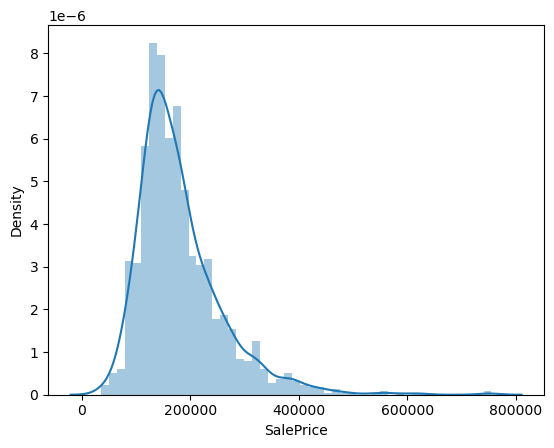

In [26]:
# Univariate analysis
sns.distplot(df['SalePrice'])

# The target variable is right-skewed


In [27]:
## Check the skewness of target variable again
df['SalePrice'].skew()

1.8828757597682129

In [28]:
## Check the kurtosis of target variable
df['SalePrice'].kurt()


# Both skewness and kurtosis are less than 1 now

6.536281860064529

In [29]:
## Divide the dataframe df into numerical and categorical columns for EDA

## Extract numerical columns

df_num = df.select_dtypes(include=["int64","float64"])
df_num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,548,0,61,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,460,298,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,608,0,42,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,642,0,35,272,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,836,192,84,0,0,0,0,12,2008,250000


In [30]:

## Extract categorical columns

df_cat = df.select_dtypes(include="object")
df_cat.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,none,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


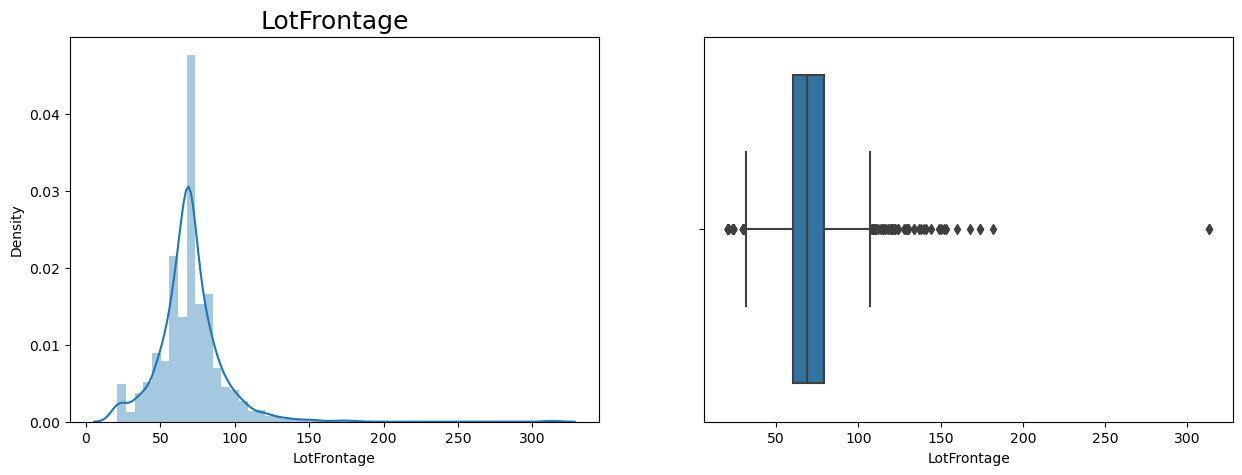

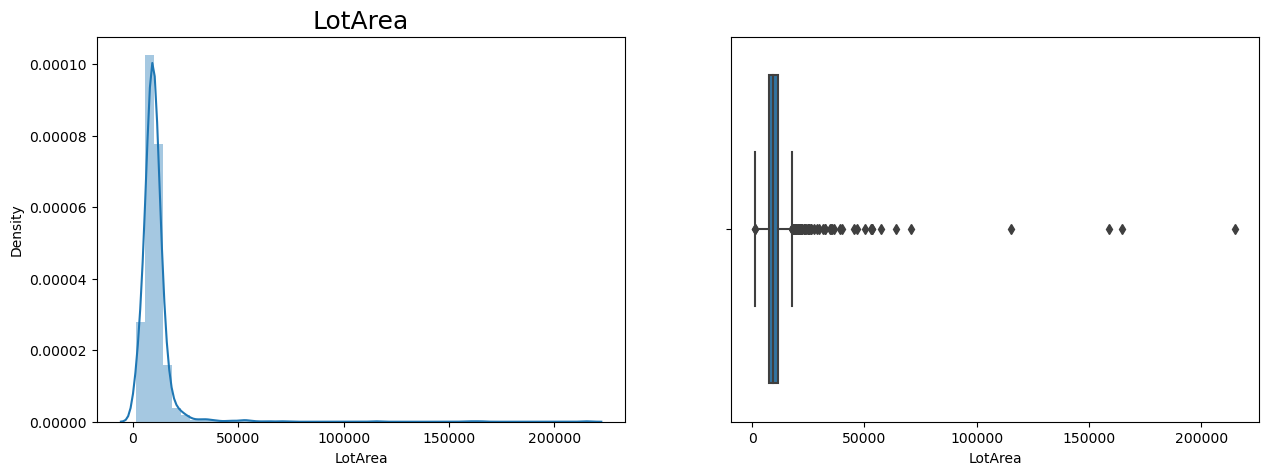

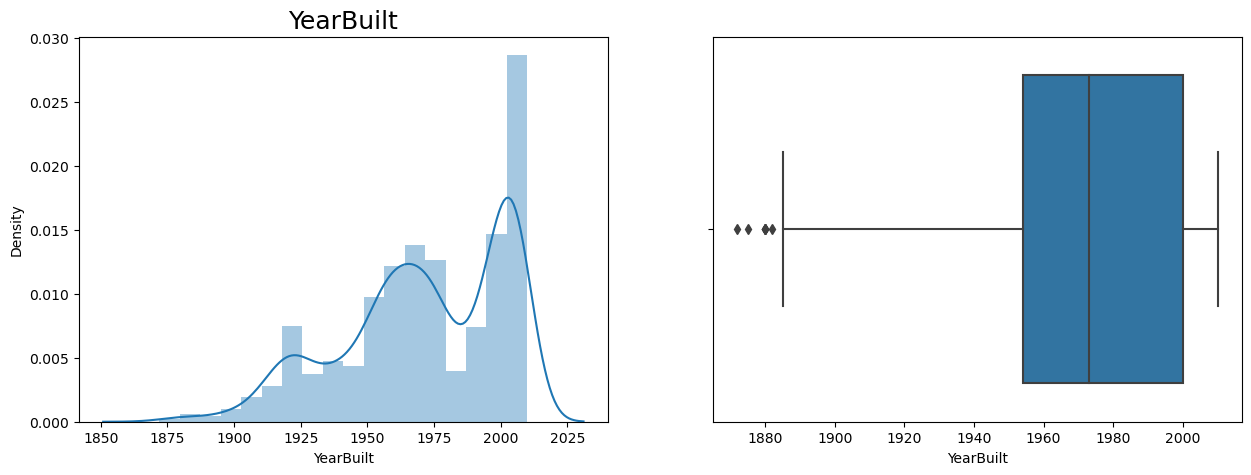

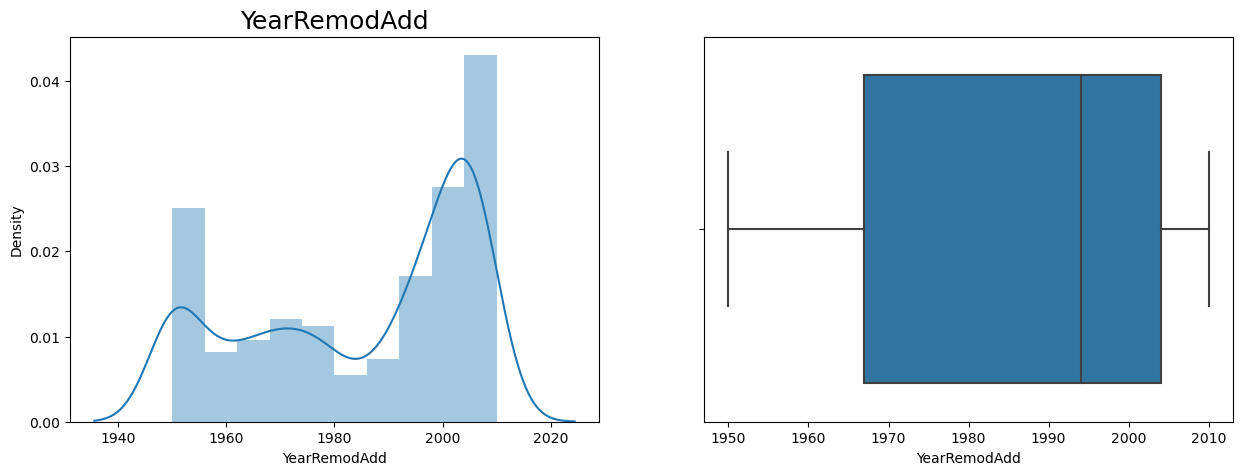

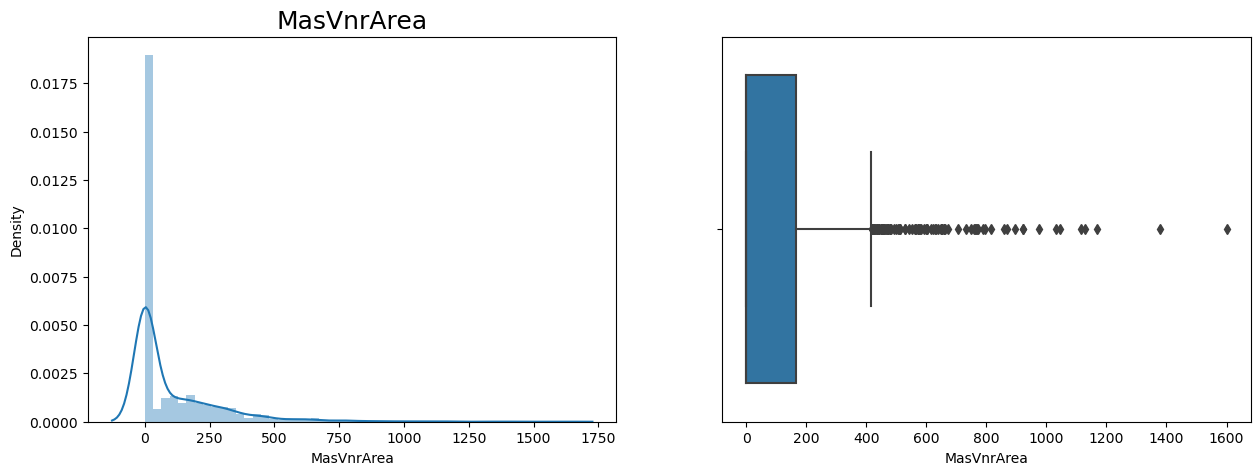

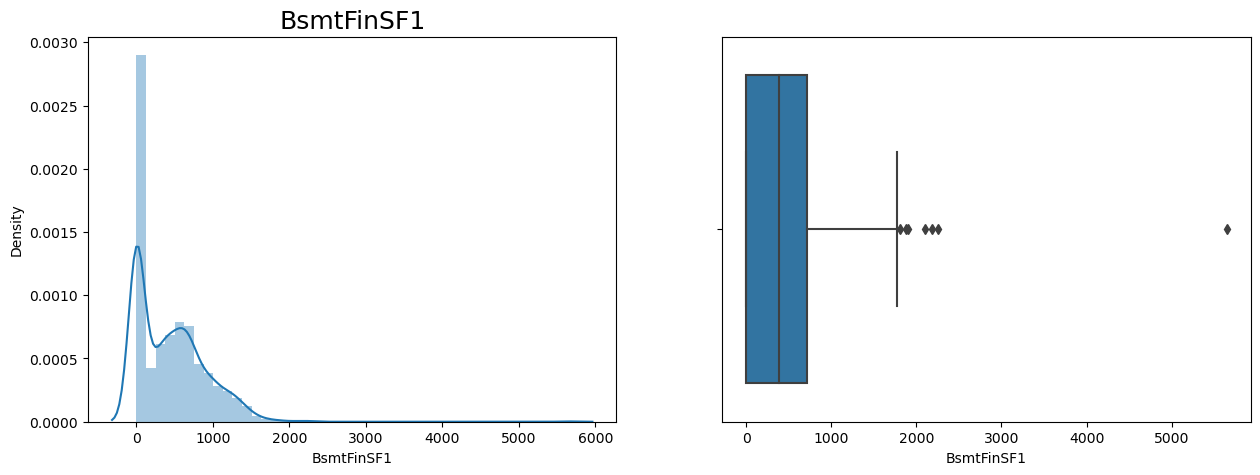

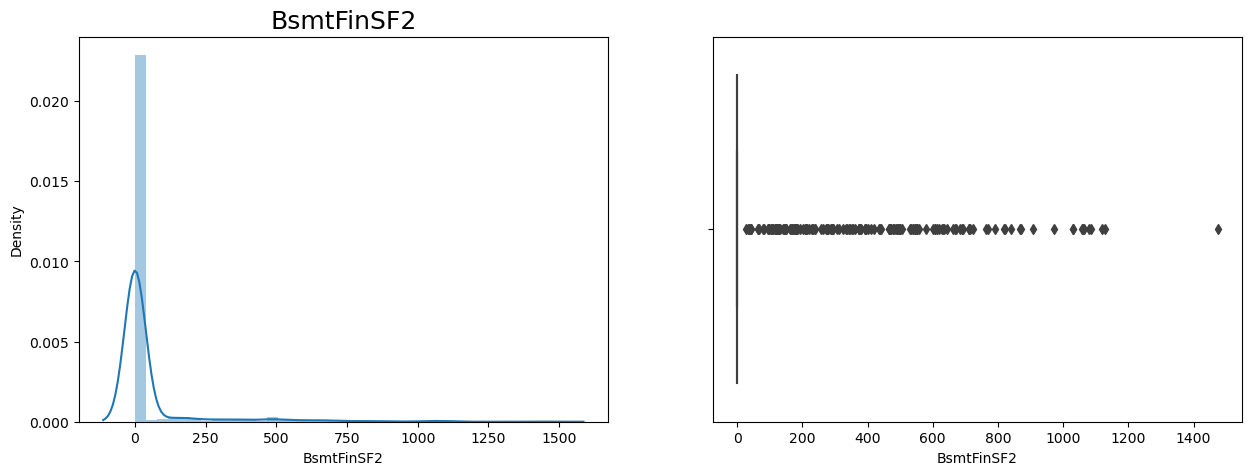

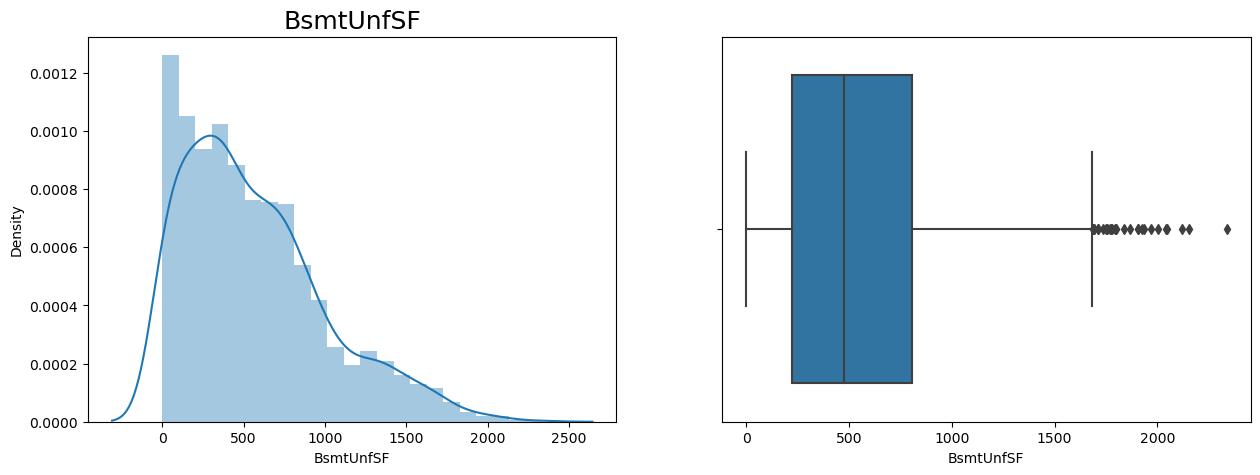

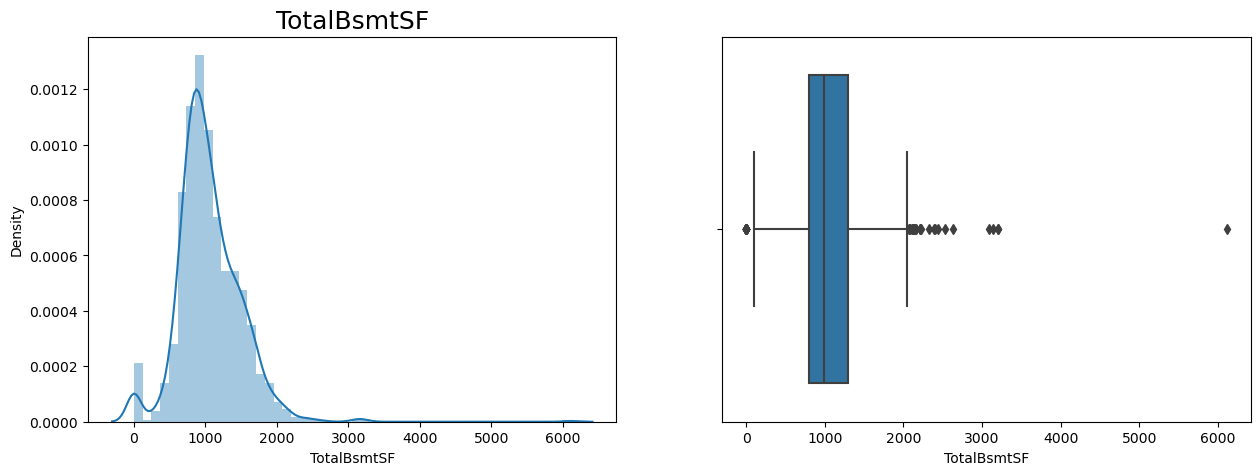

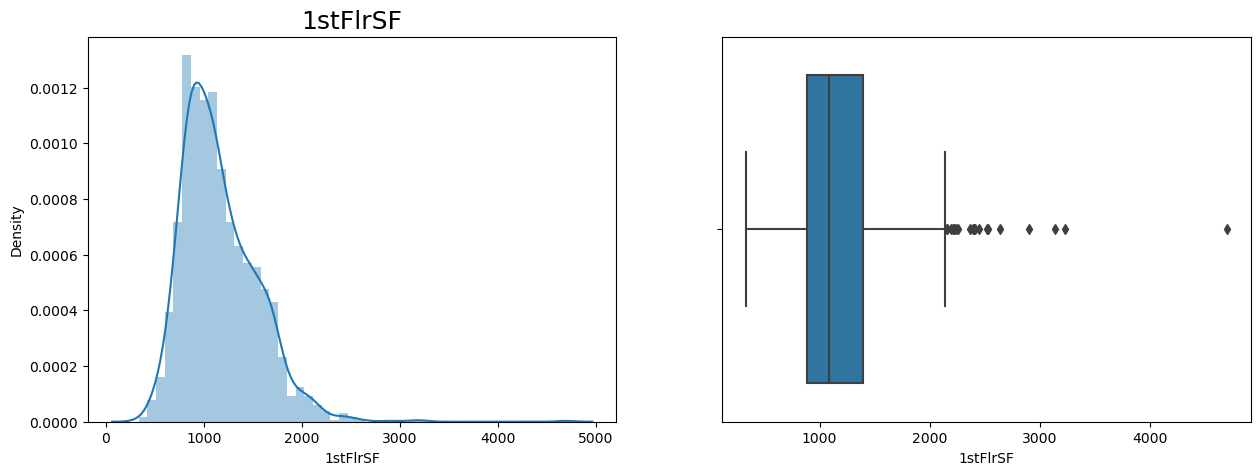

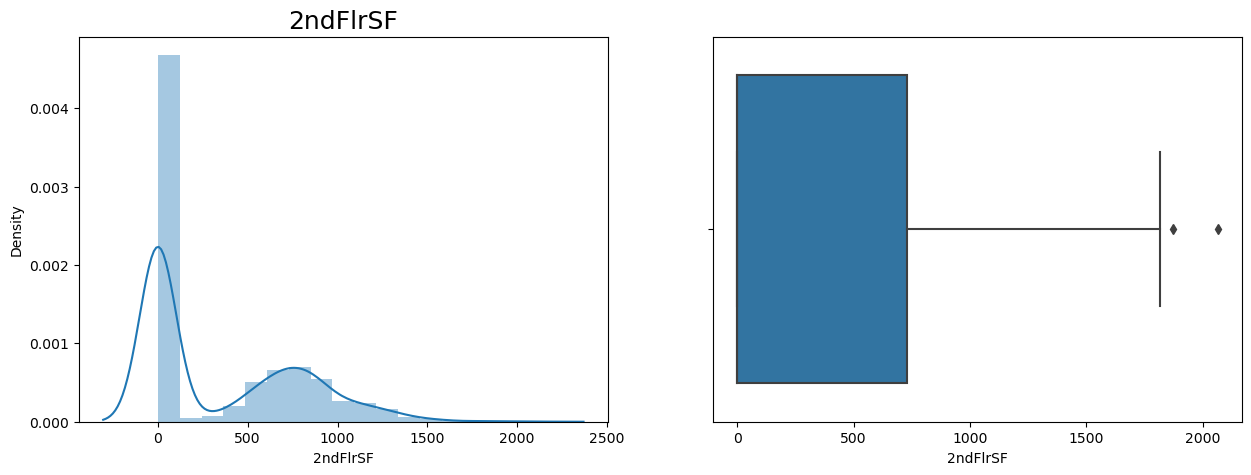

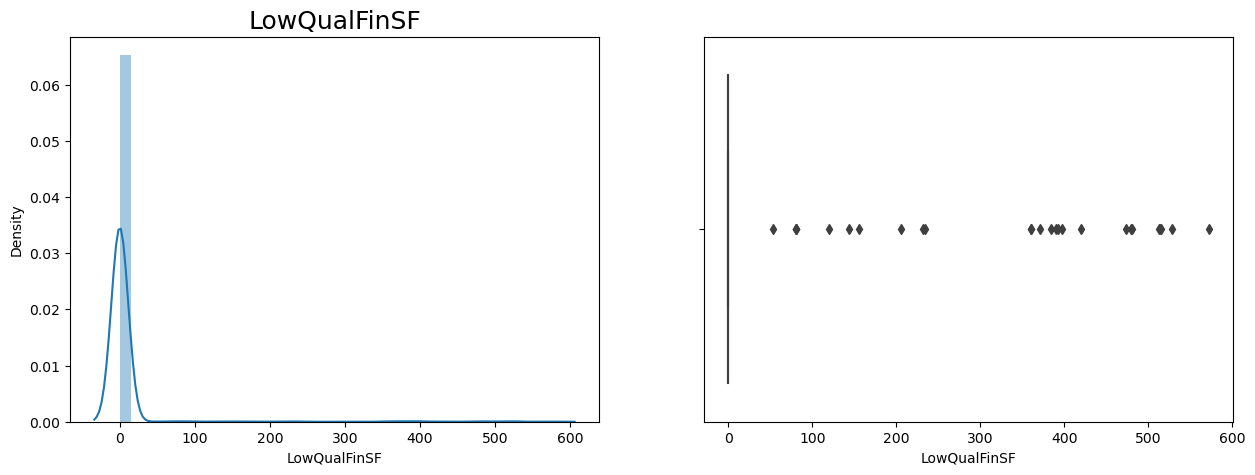

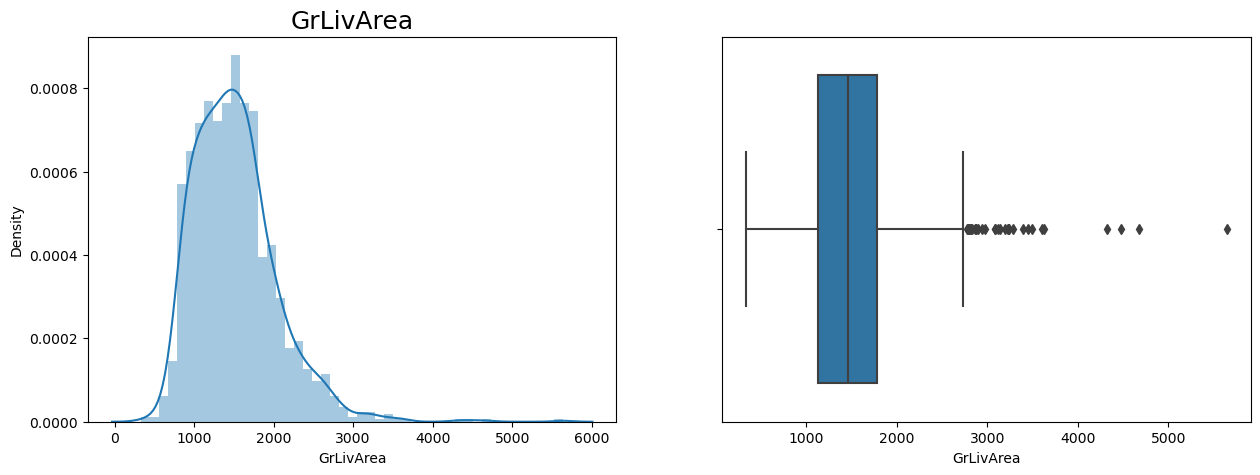

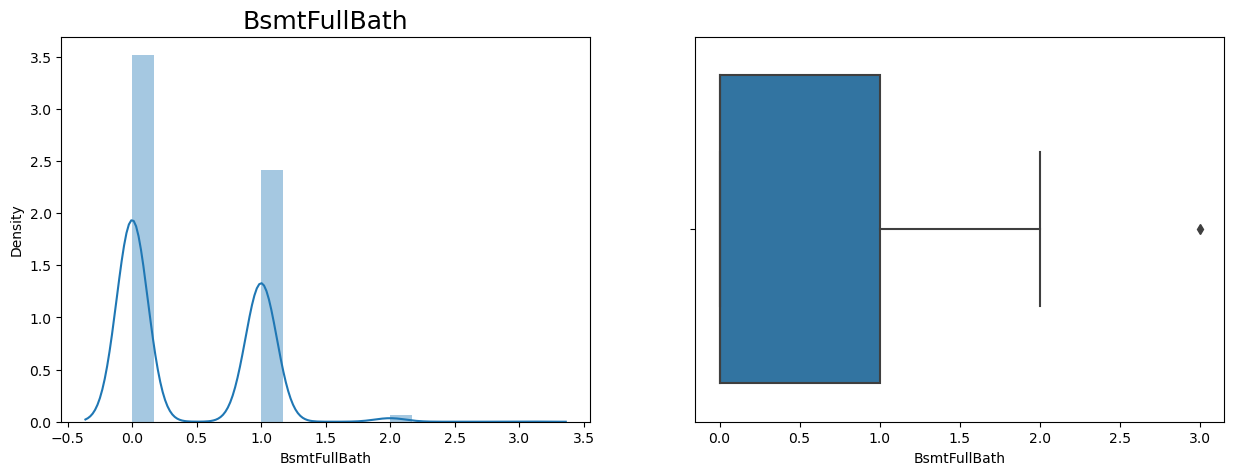

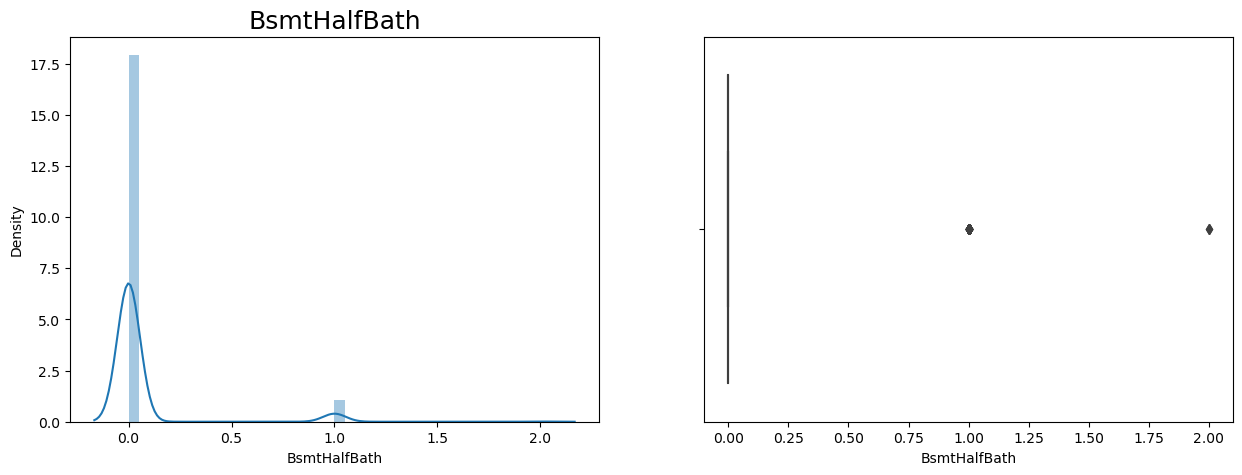

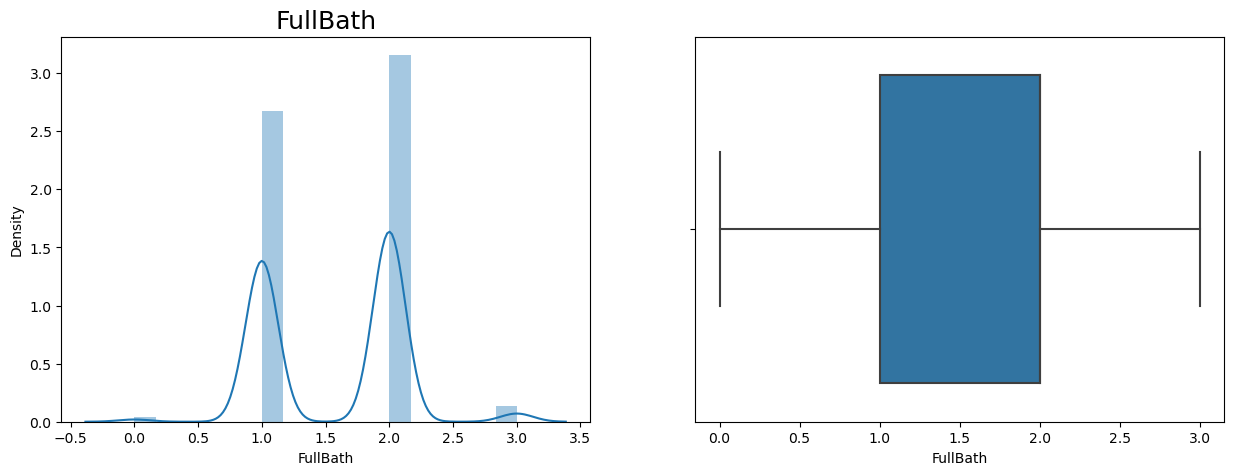

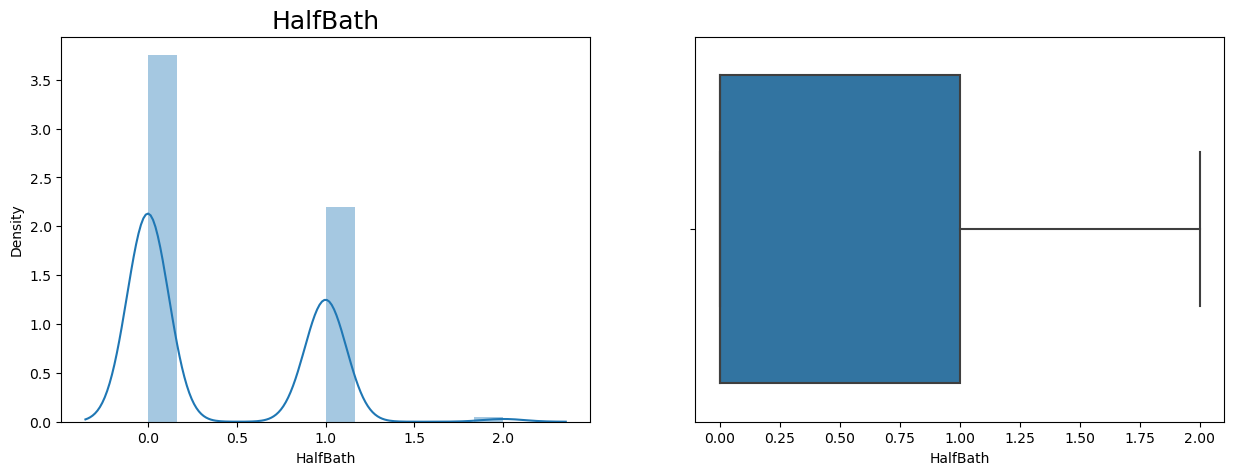

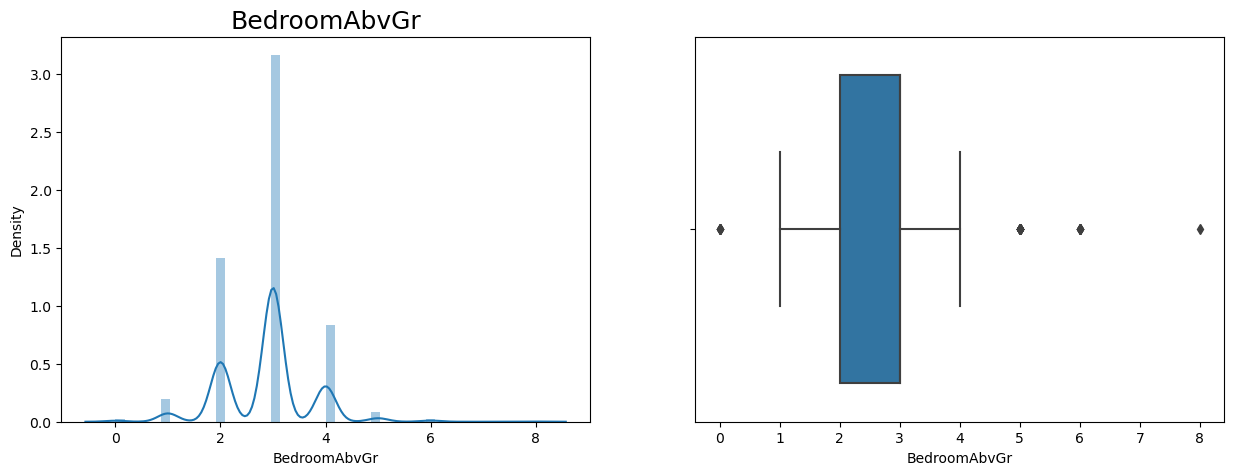

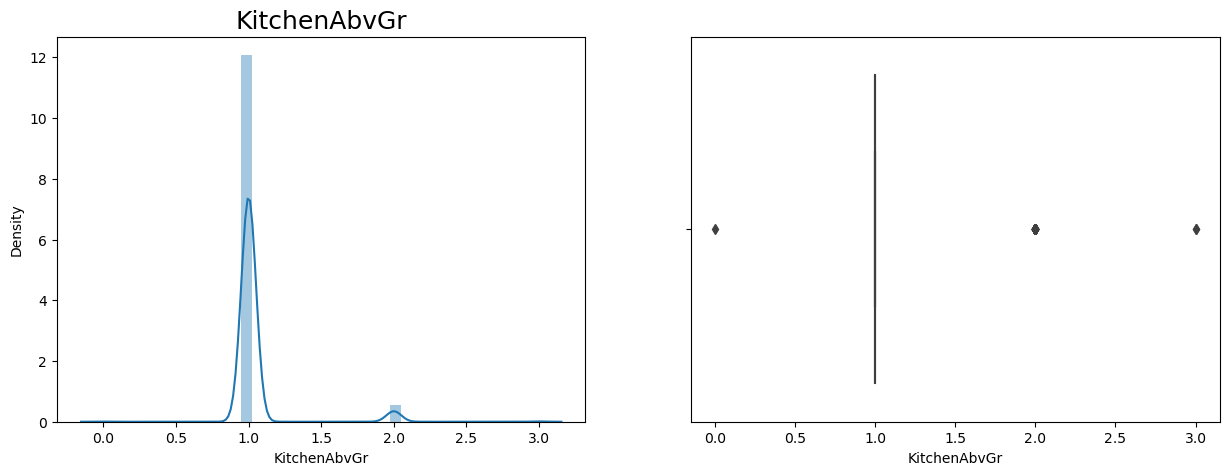

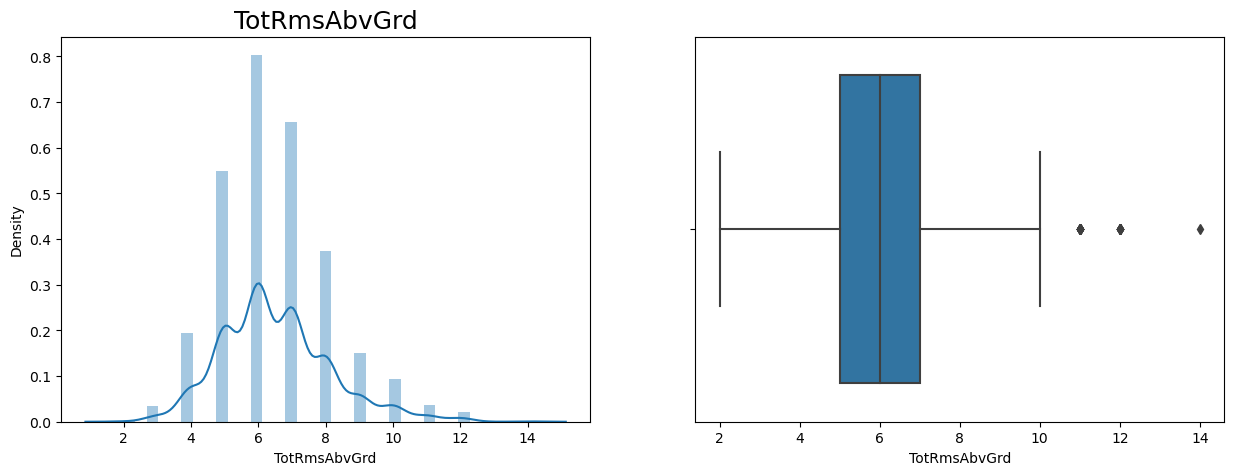

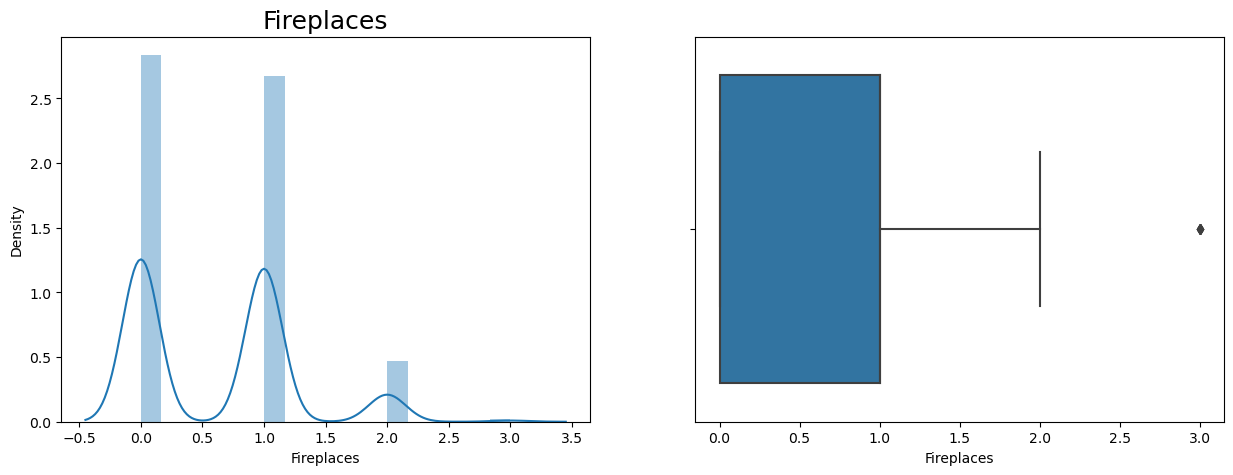

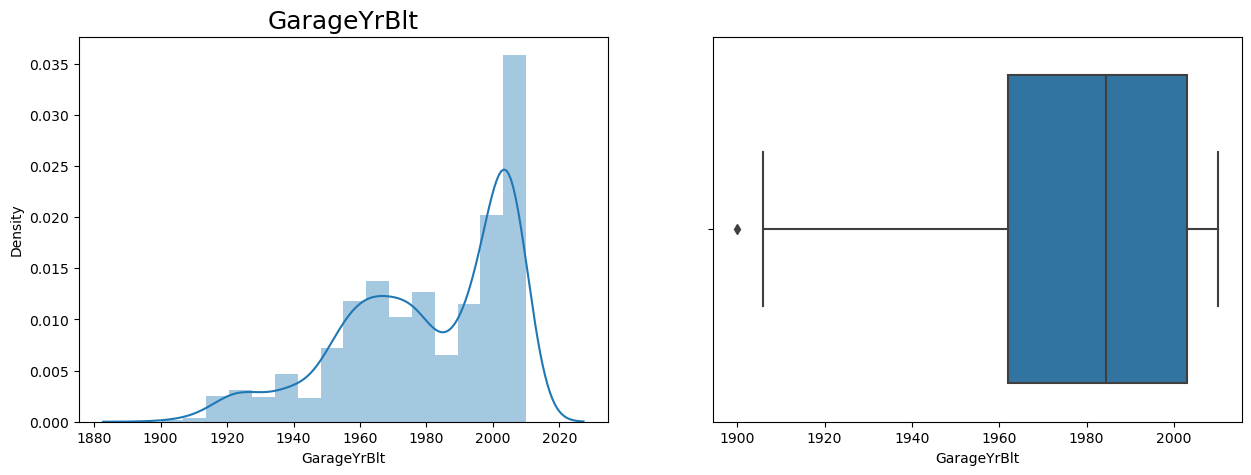

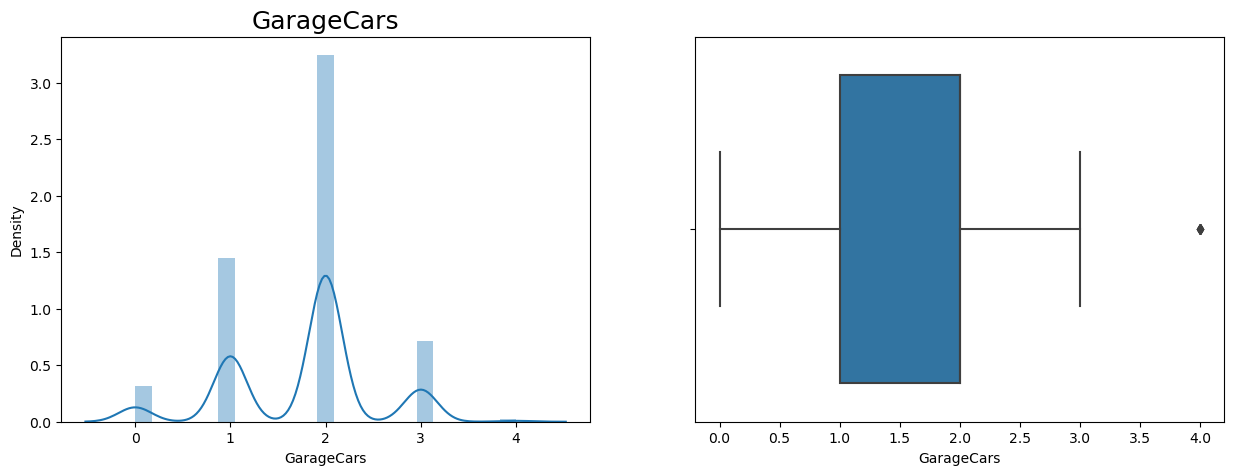

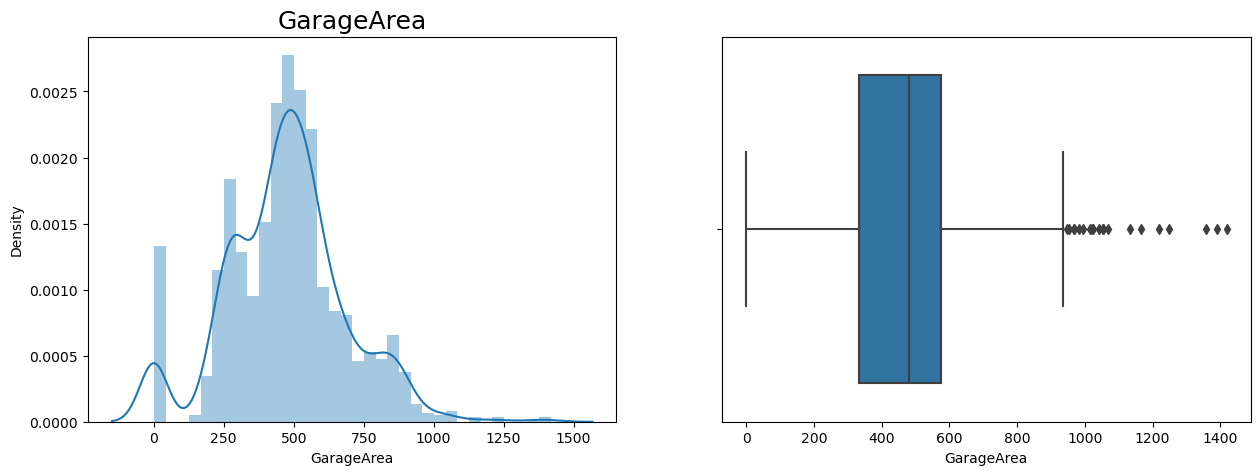

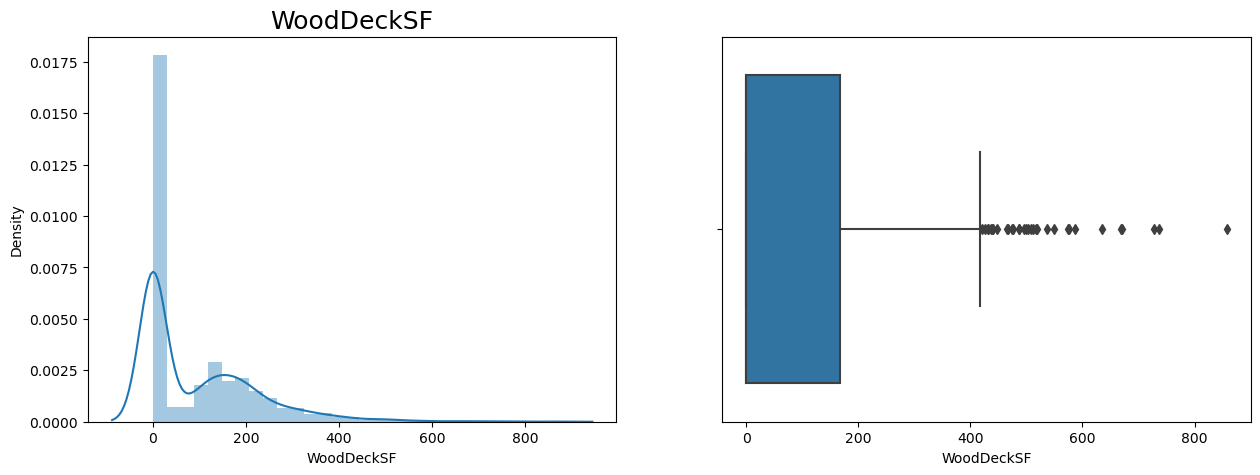

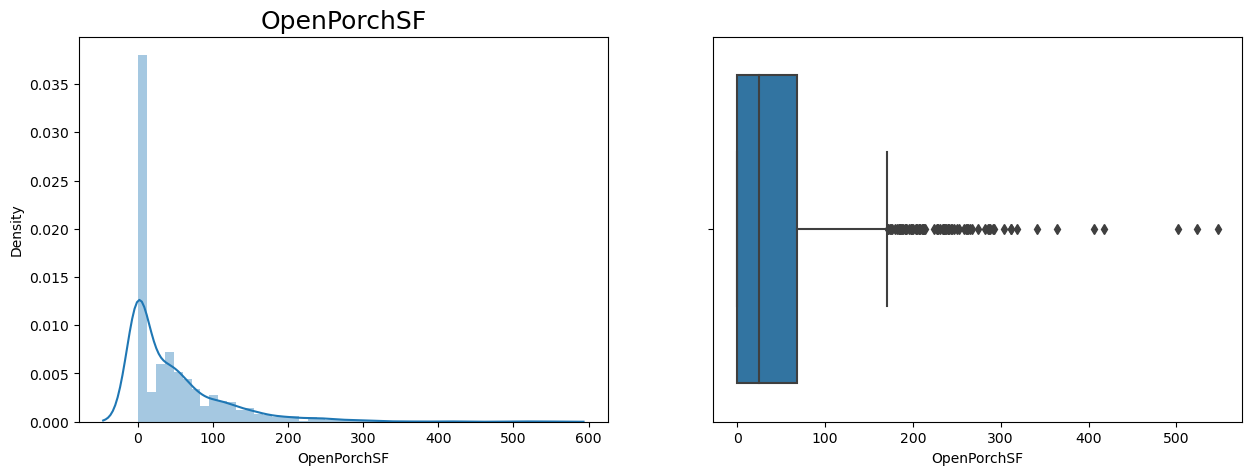

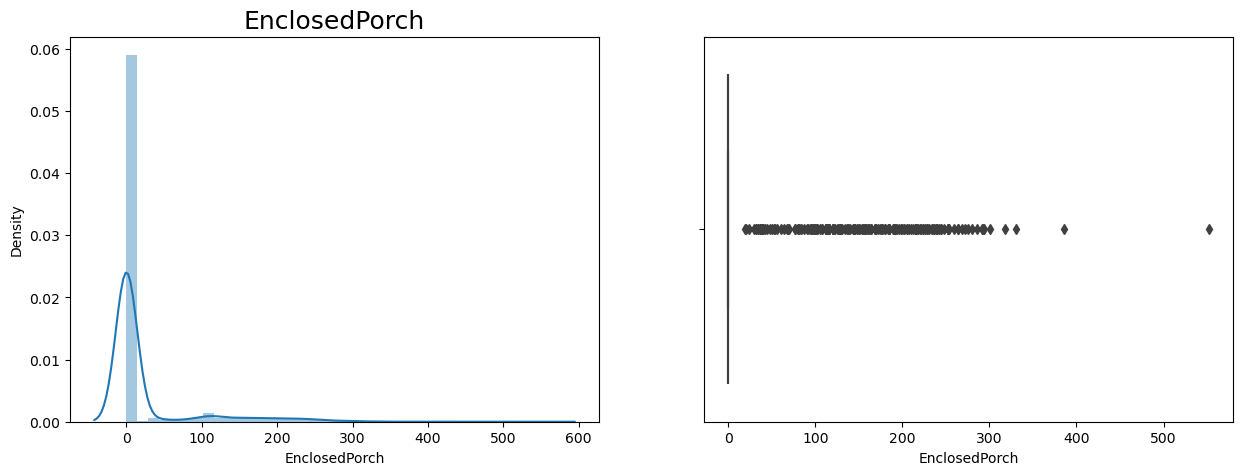

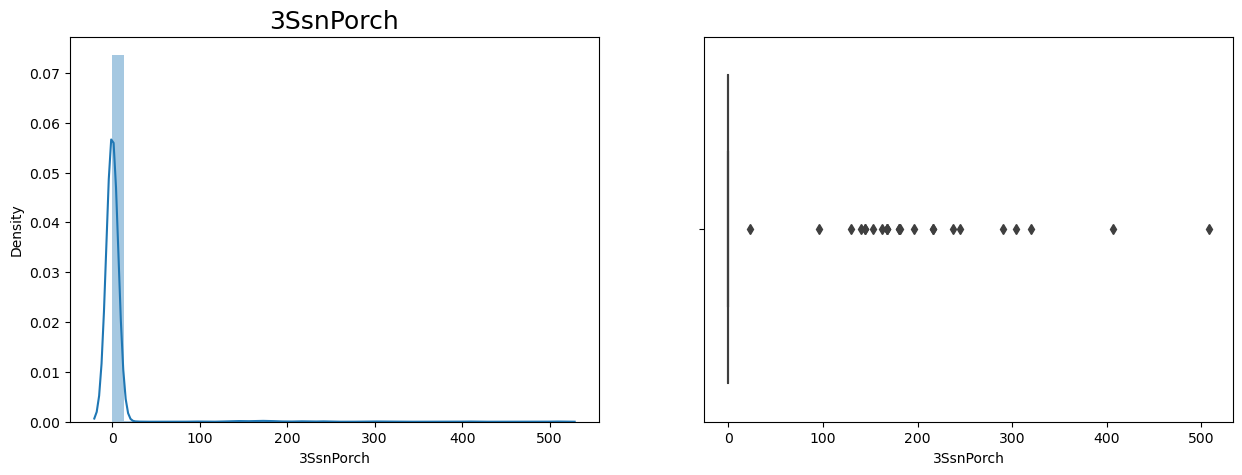

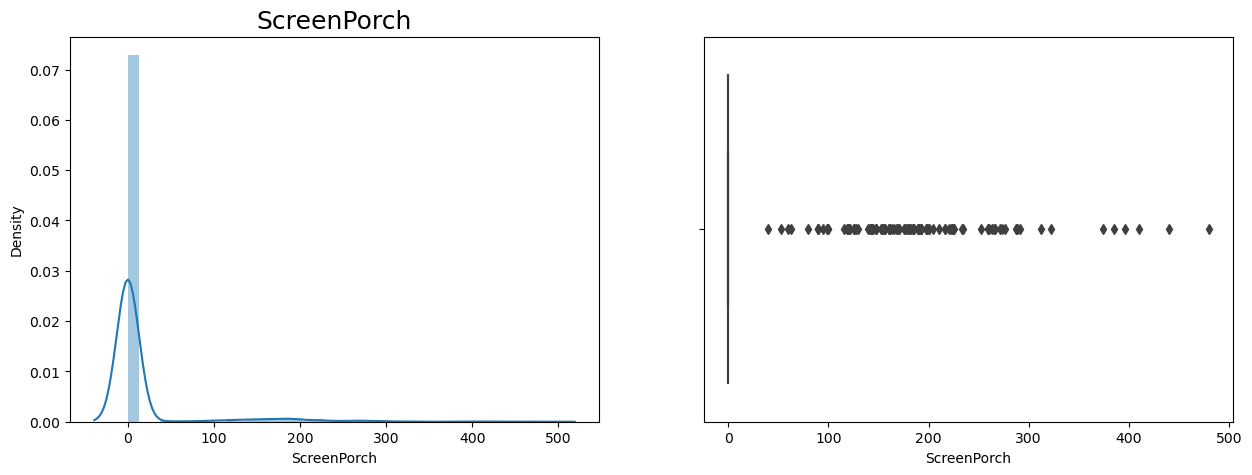

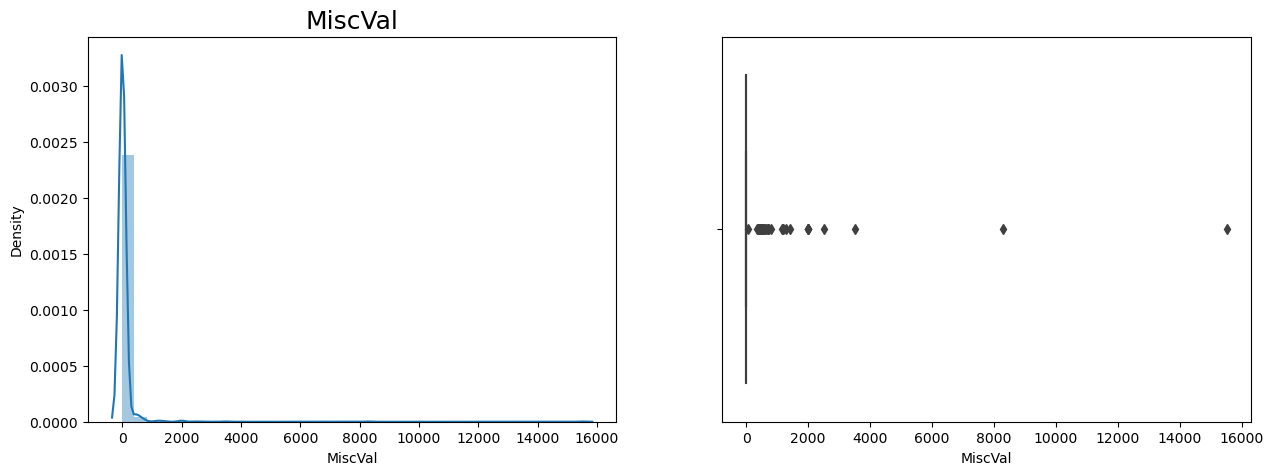

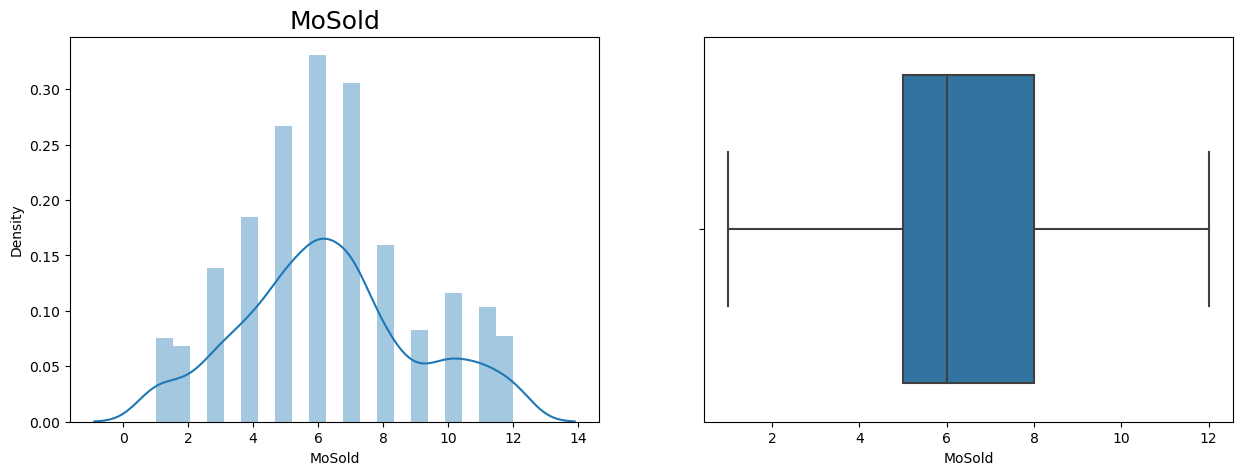

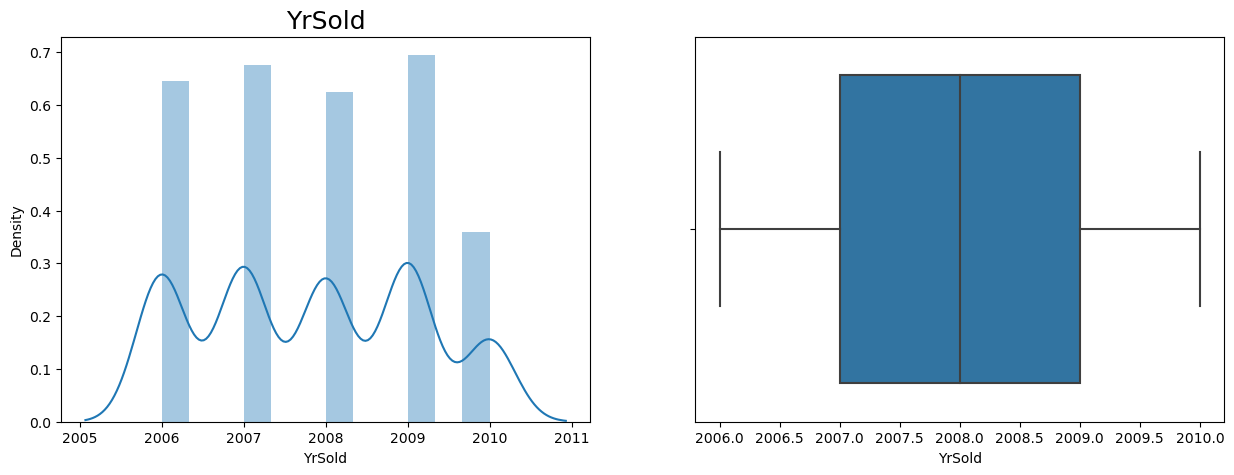

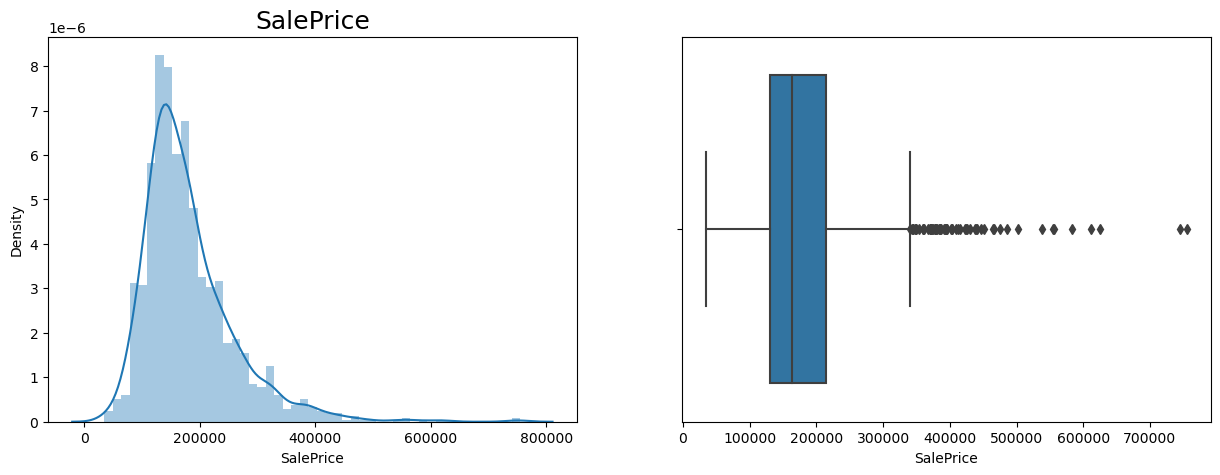

In [31]:
## View the distribution of all numeric variables using histograms and boxplots

for col in df_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()  
    
#  observation:Many of the numerical columns are having non-normal distribution.
# Most of the columns have outliers. So, we will require to do Outlier treatment.

In [32]:
## View the unique values of all Categorical columns
for col in df_cat.columns:
    print("{} has {} unique number of categories".format(col,len(df[col].unique())))

    
#     Neighborhood,Exterior1st,Exterior2nd has more than 10  unique features

MSSubClass has 15 unique number of categories
MSZoning has 5 unique number of categories
Street has 2 unique number of categories
LotShape has 4 unique number of categories
LandContour has 4 unique number of categories
Utilities has 2 unique number of categories
LotConfig has 5 unique number of categories
LandSlope has 3 unique number of categories
Neighborhood has 25 unique number of categories
Condition1 has 9 unique number of categories
Condition2 has 8 unique number of categories
BldgType has 5 unique number of categories
HouseStyle has 8 unique number of categories
OverallQual has 10 unique number of categories
OverallCond has 9 unique number of categories
RoofStyle has 6 unique number of categories
RoofMatl has 8 unique number of categories
Exterior1st has 15 unique number of categories
Exterior2nd has 16 unique number of categories
MasVnrType has 5 unique number of categories
ExterQual has 4 unique number of categories
ExterCond has 5 unique number of categories
Foundation has 6

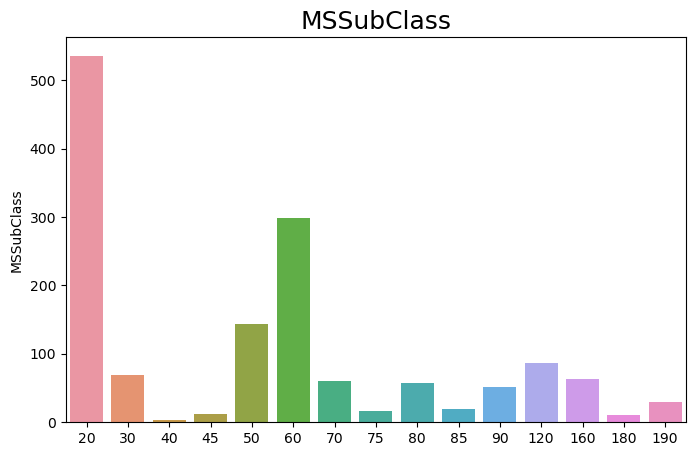

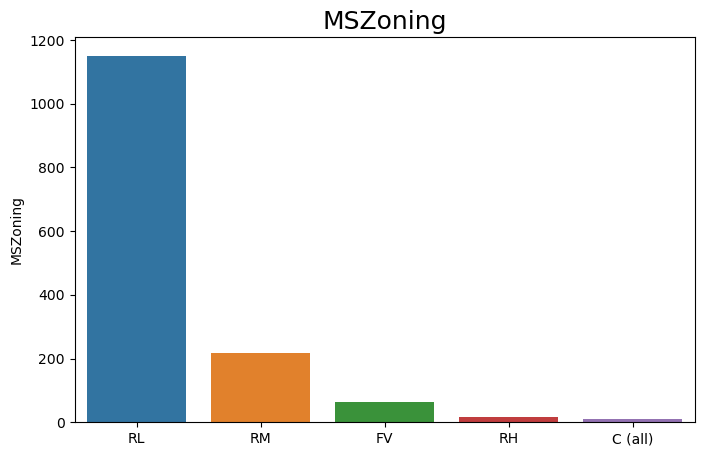

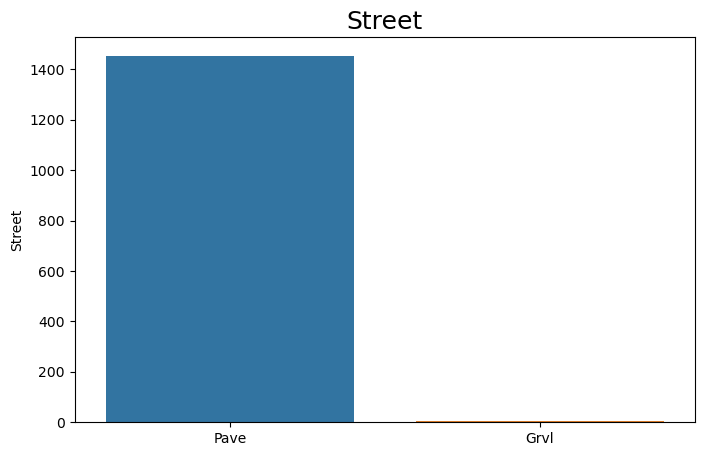

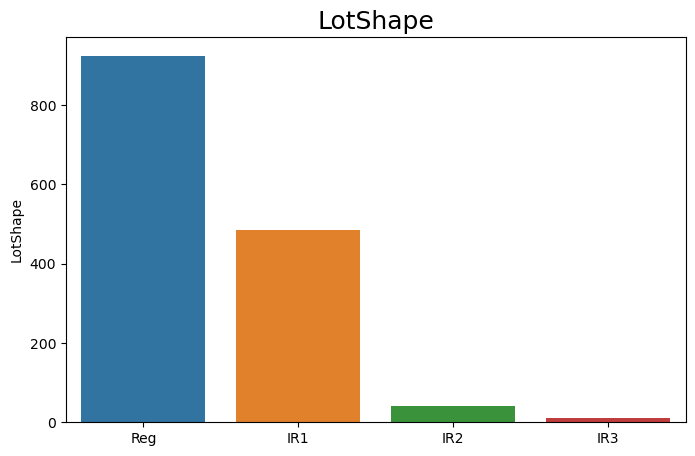

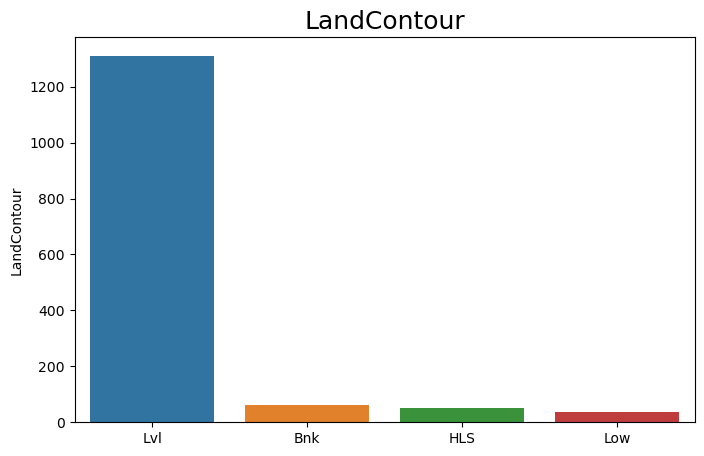

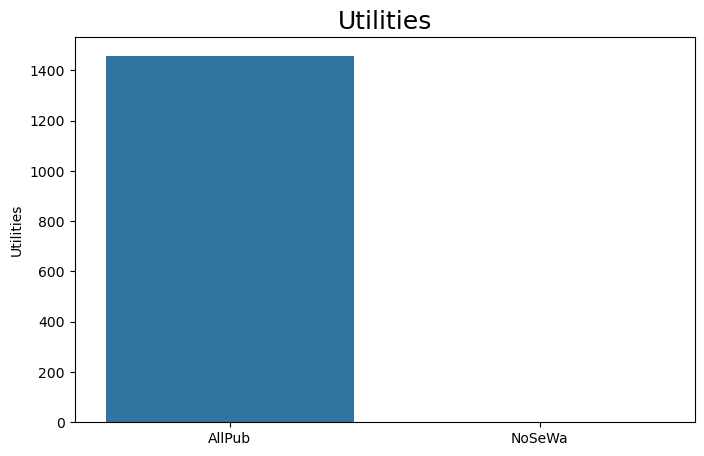

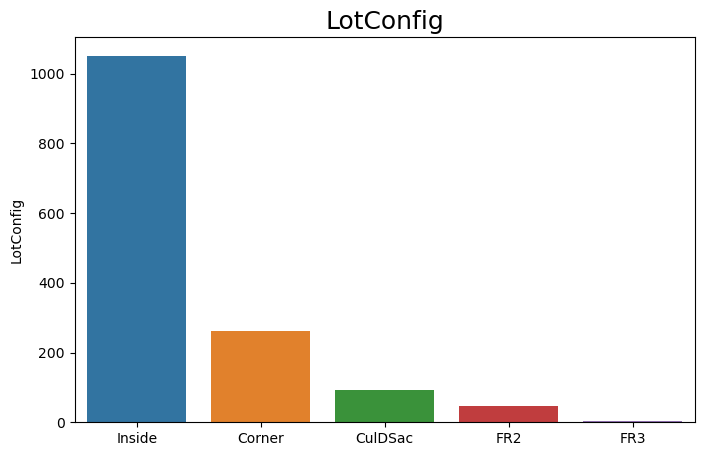

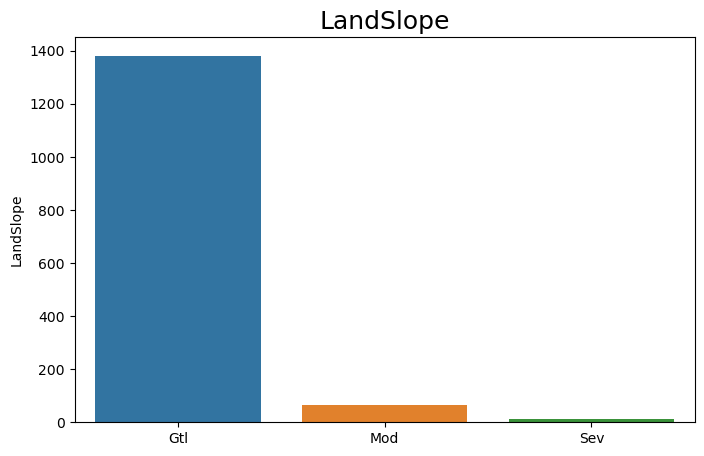

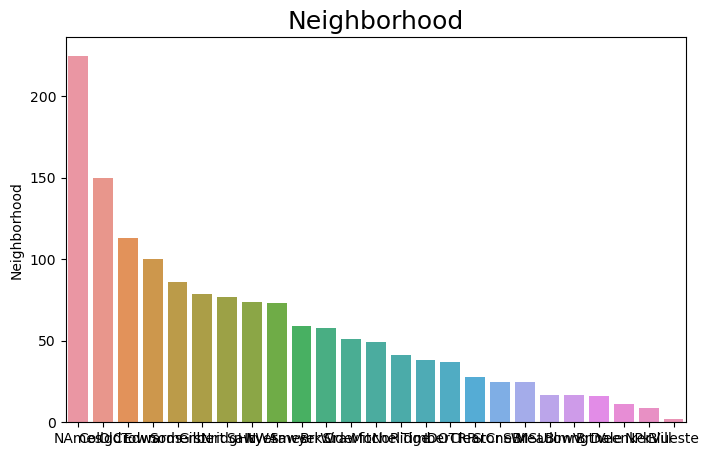

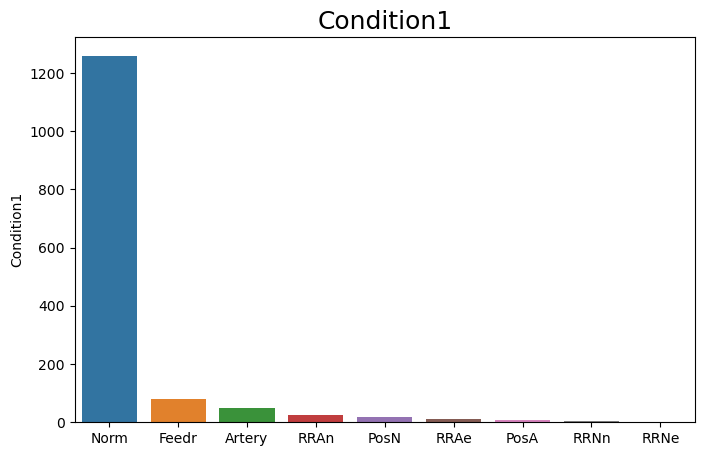

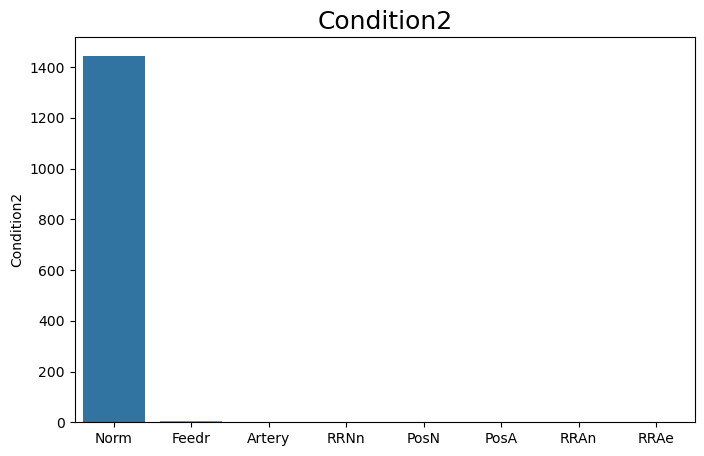

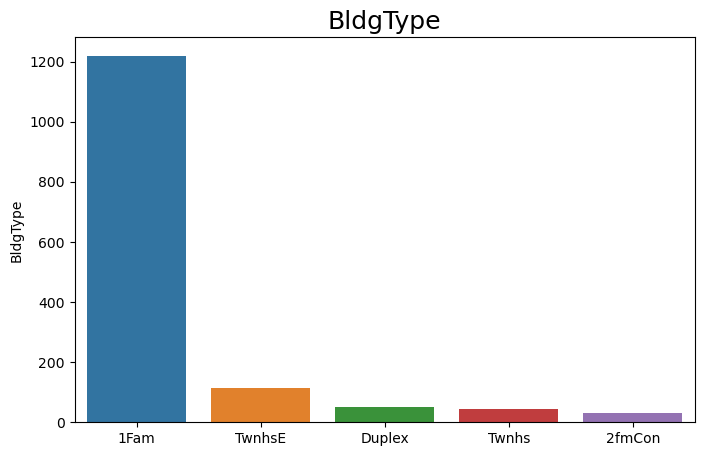

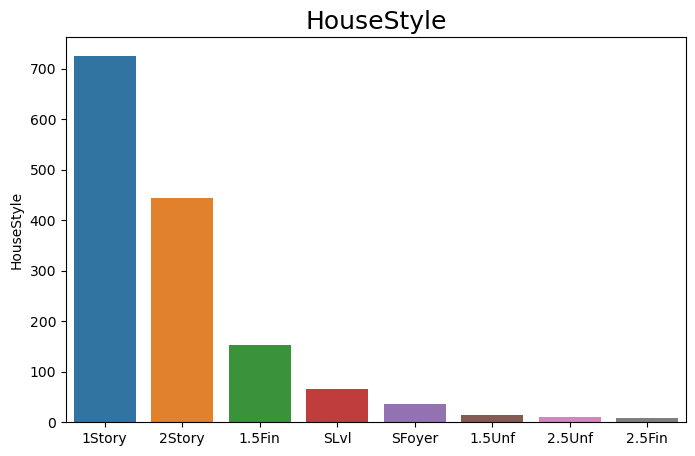

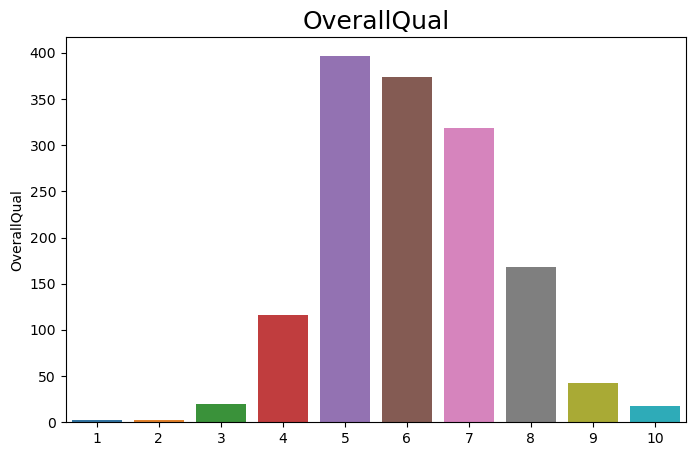

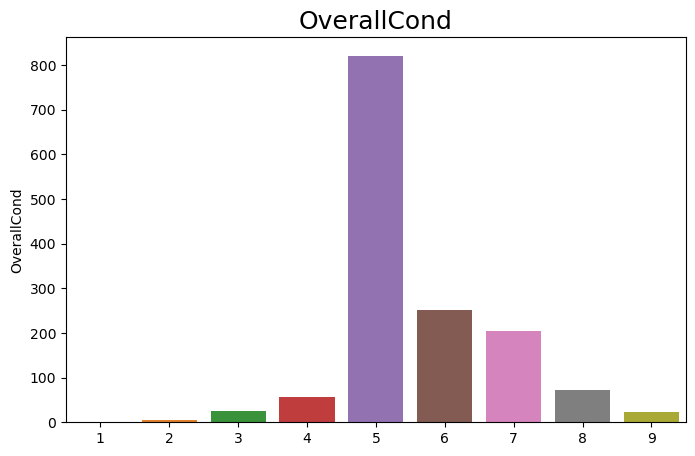

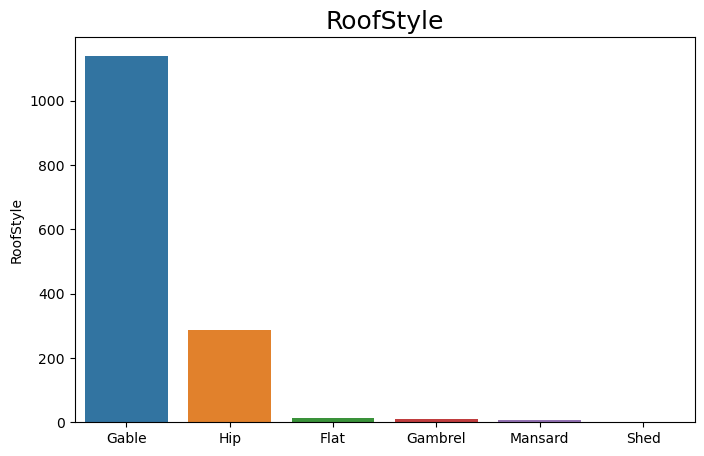

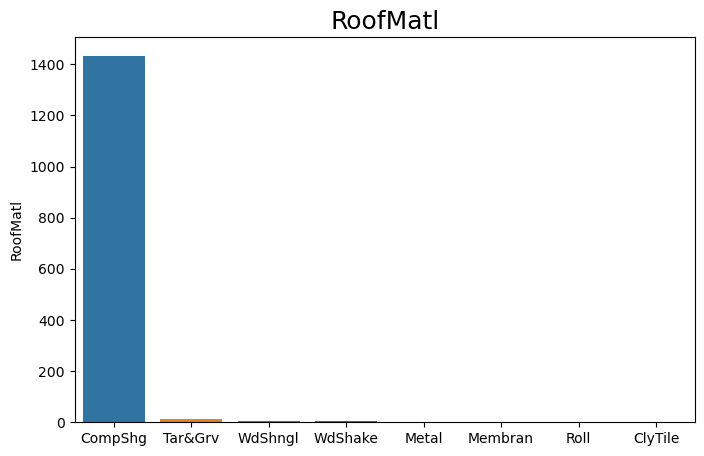

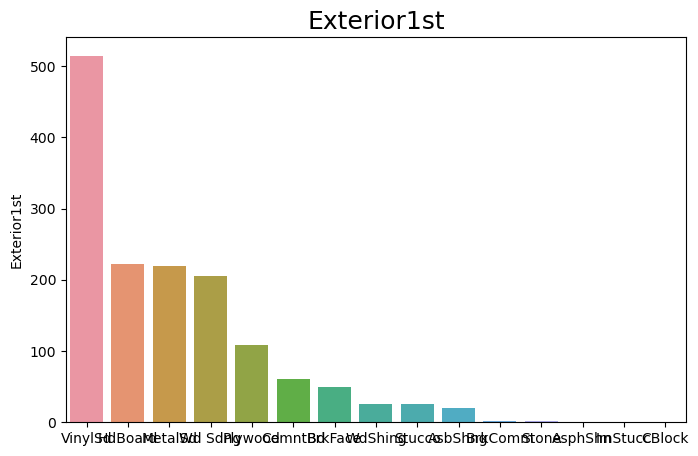

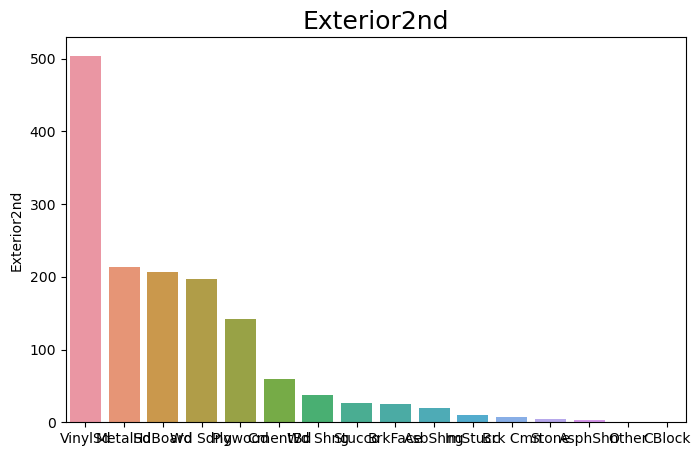

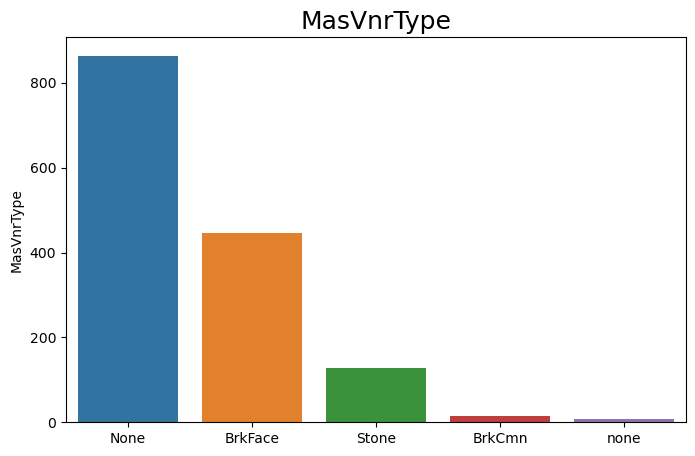

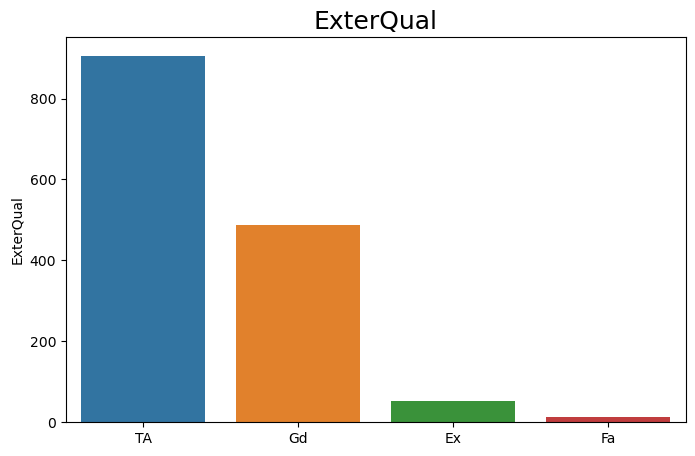

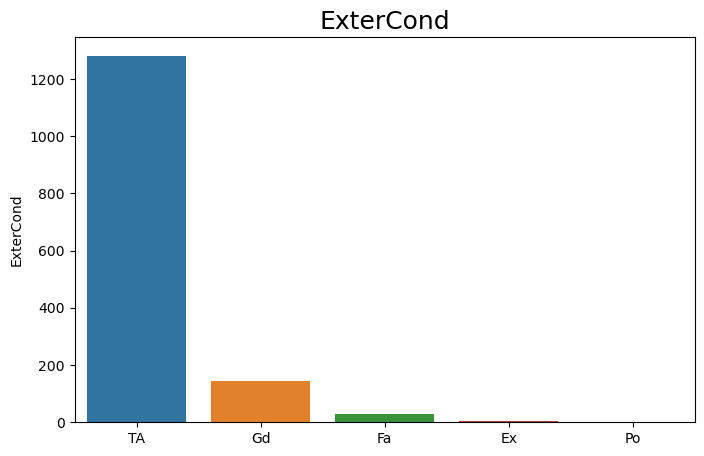

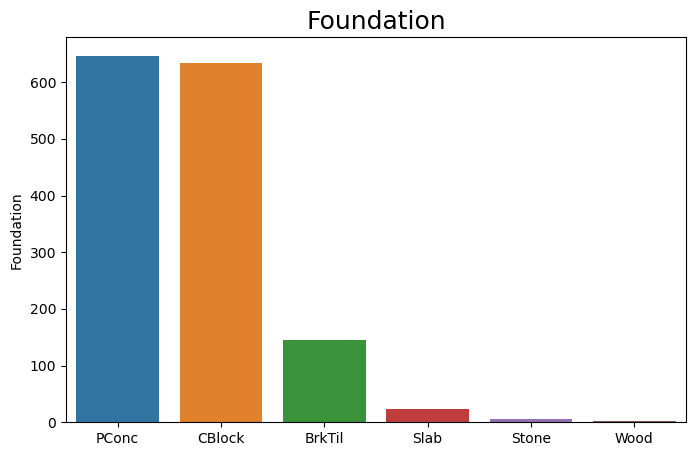

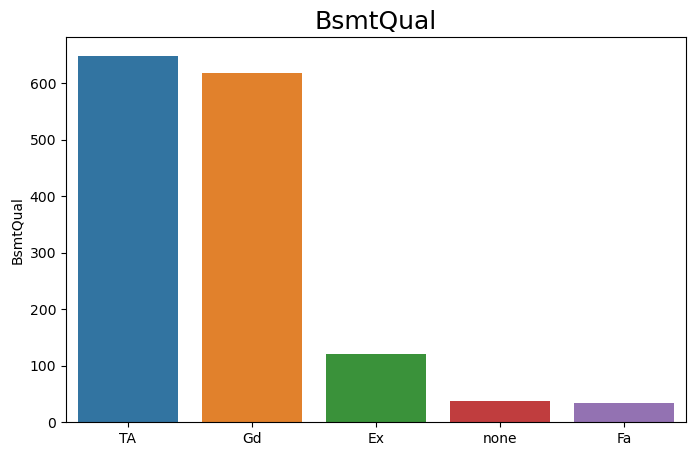

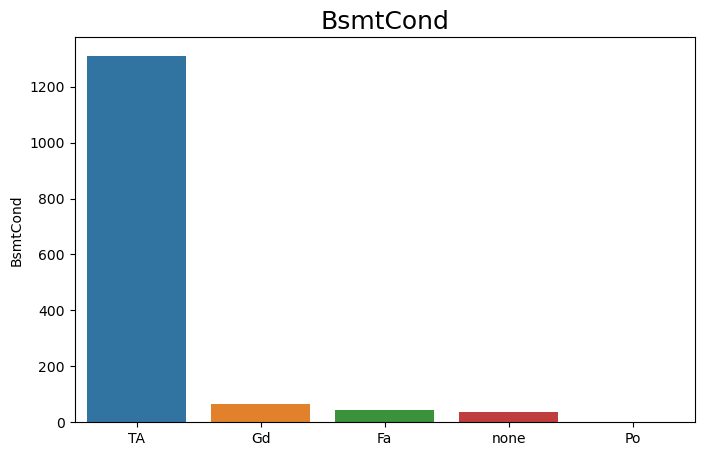

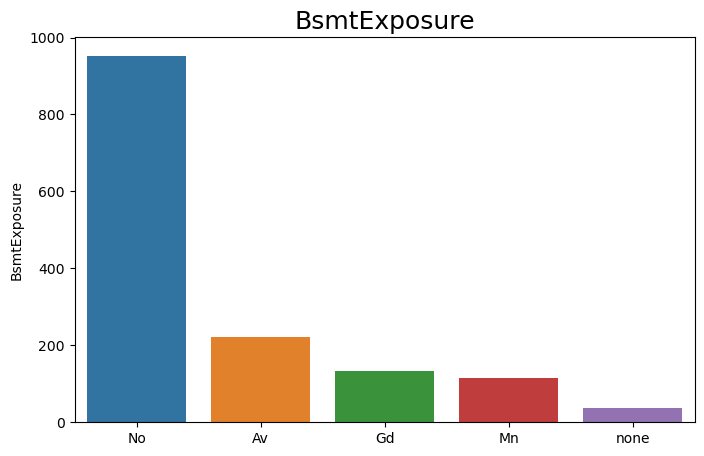

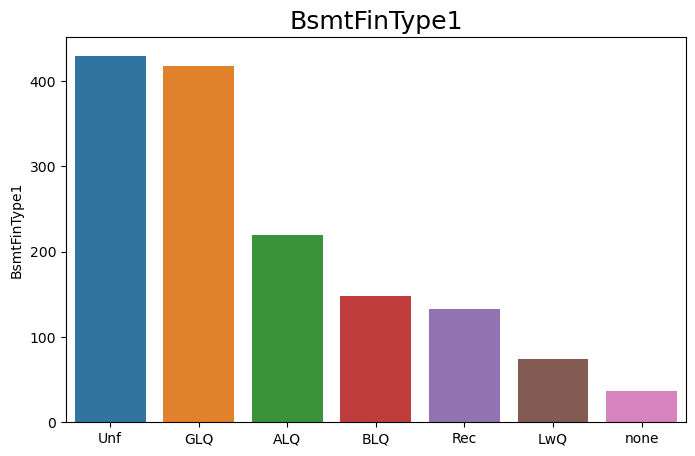

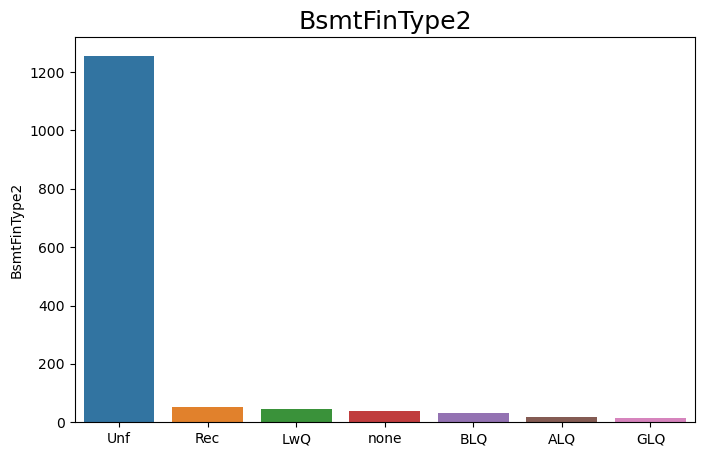

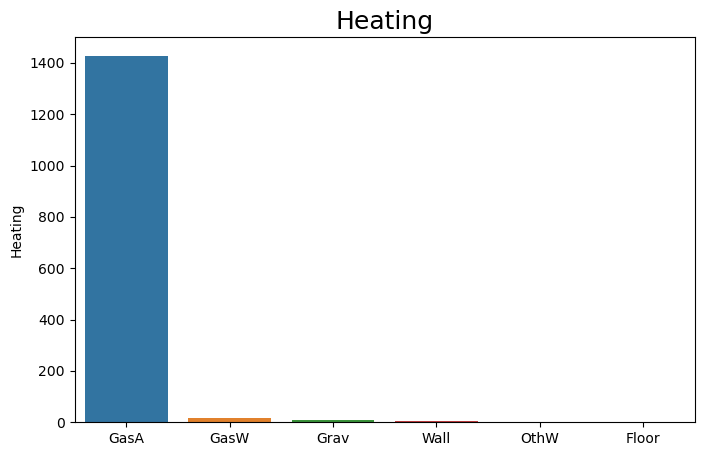

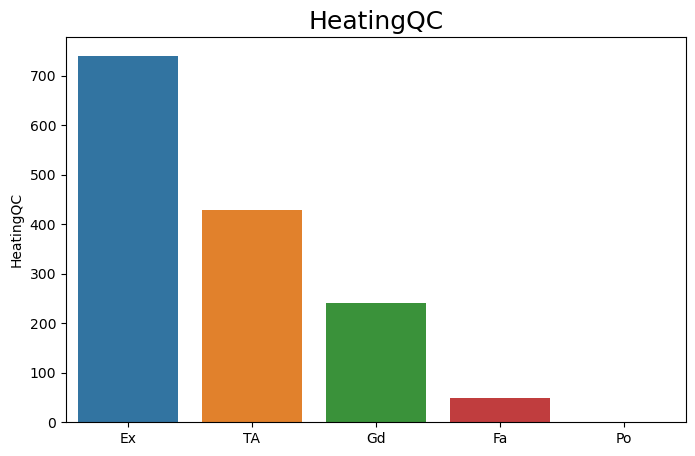

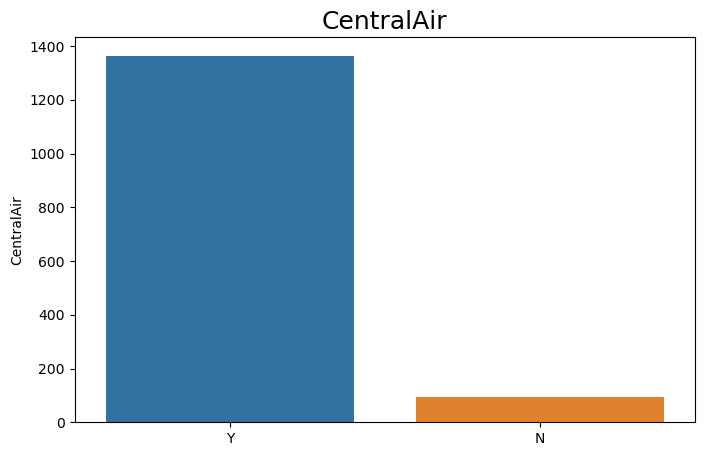

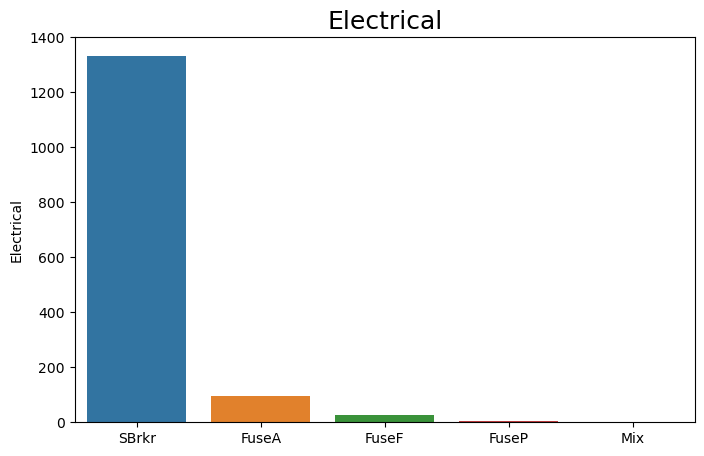

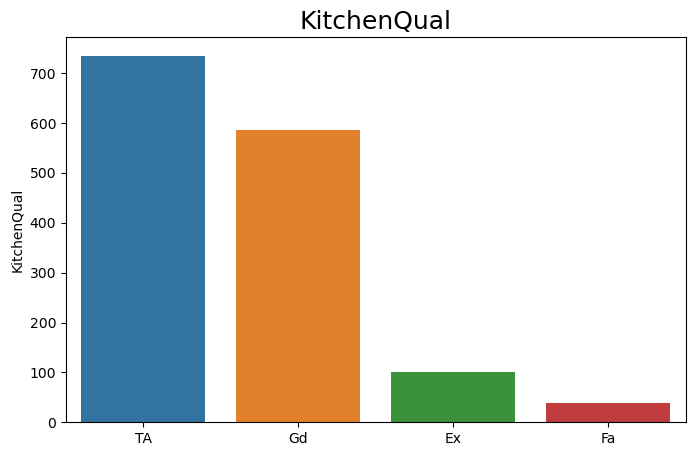

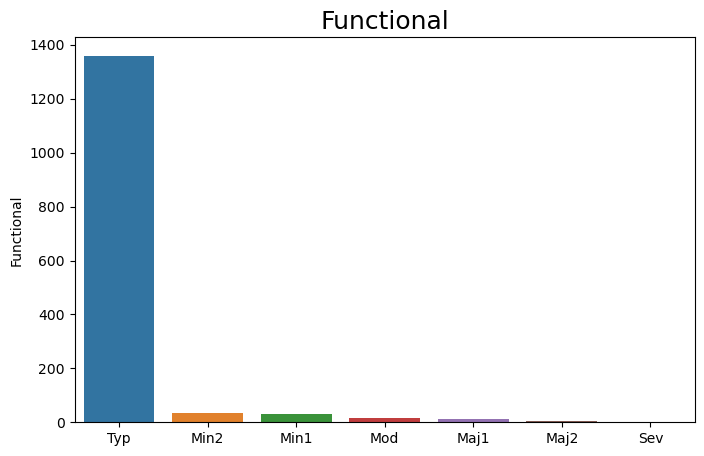

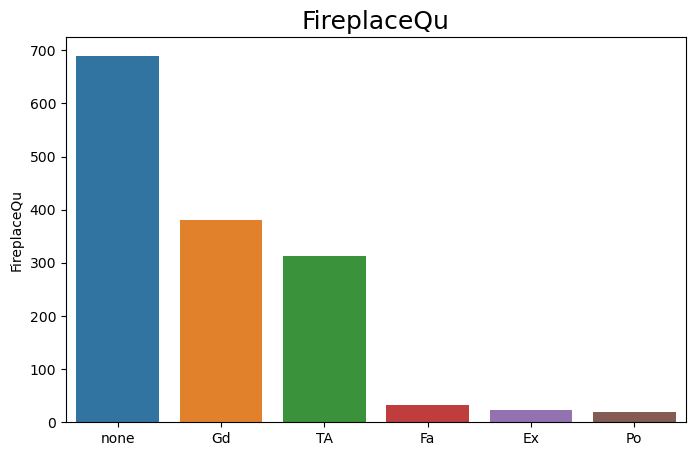

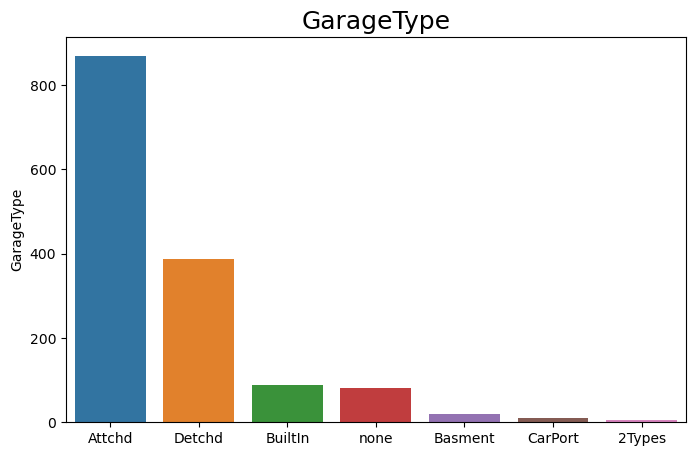

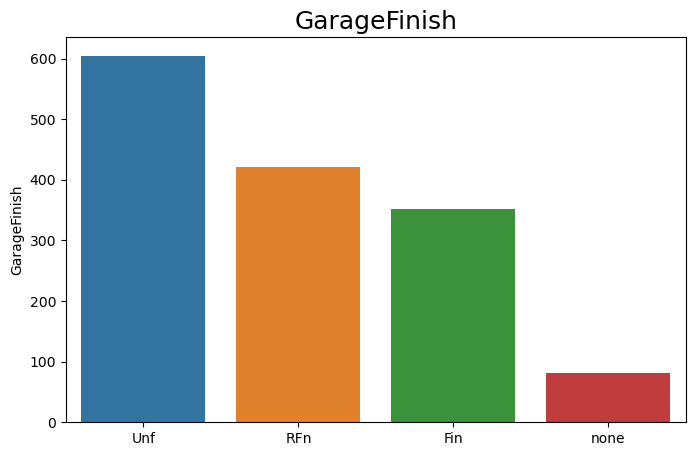

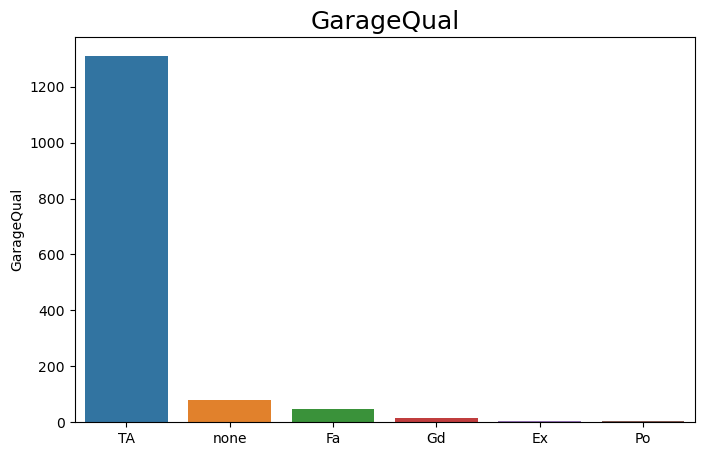

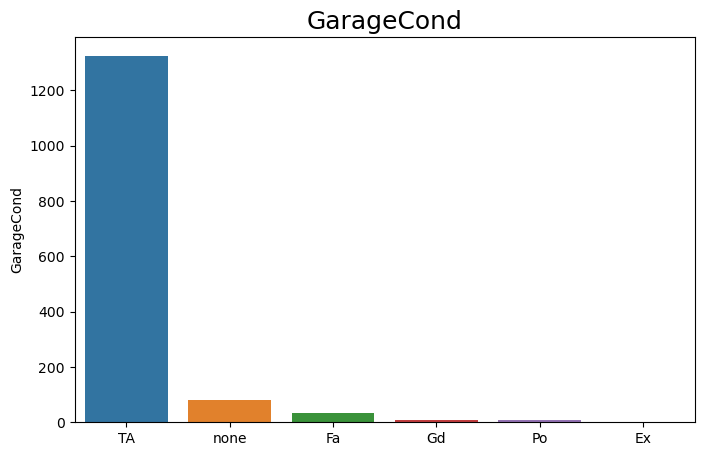

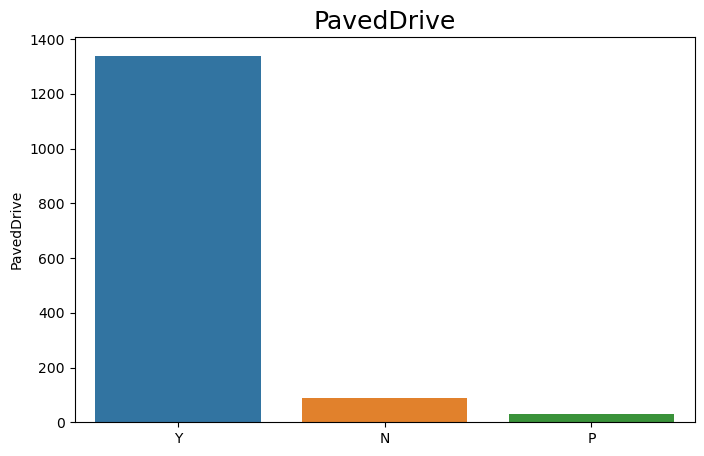

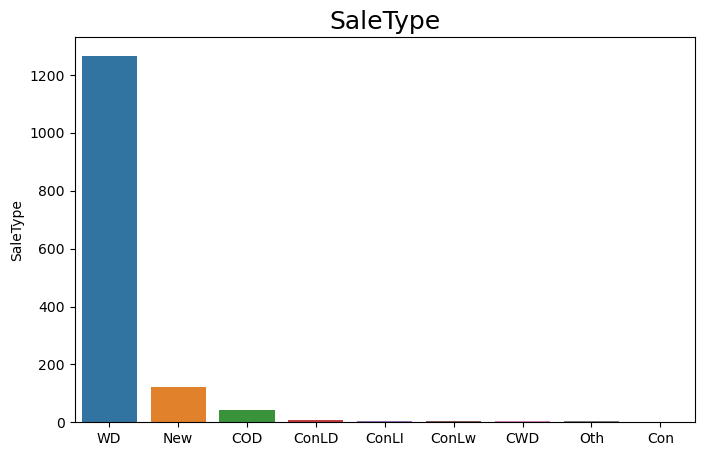

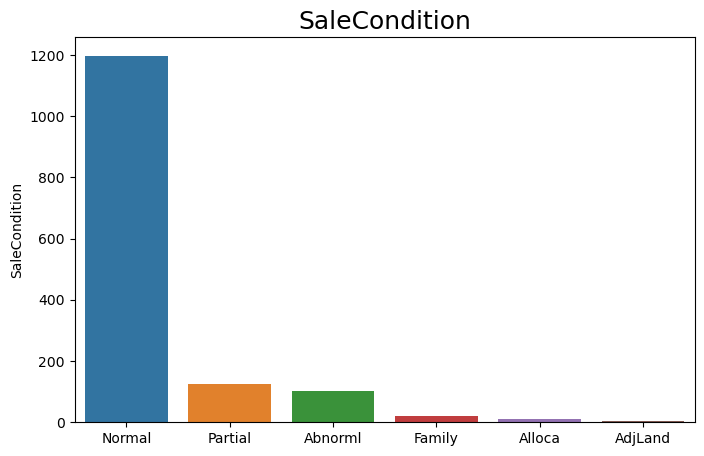

In [33]:
## Visualizing the levels of categorical columns using bar plots
for col in df_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(df_cat[col].value_counts().index, df_cat[col].value_counts())

    
    plt.show()

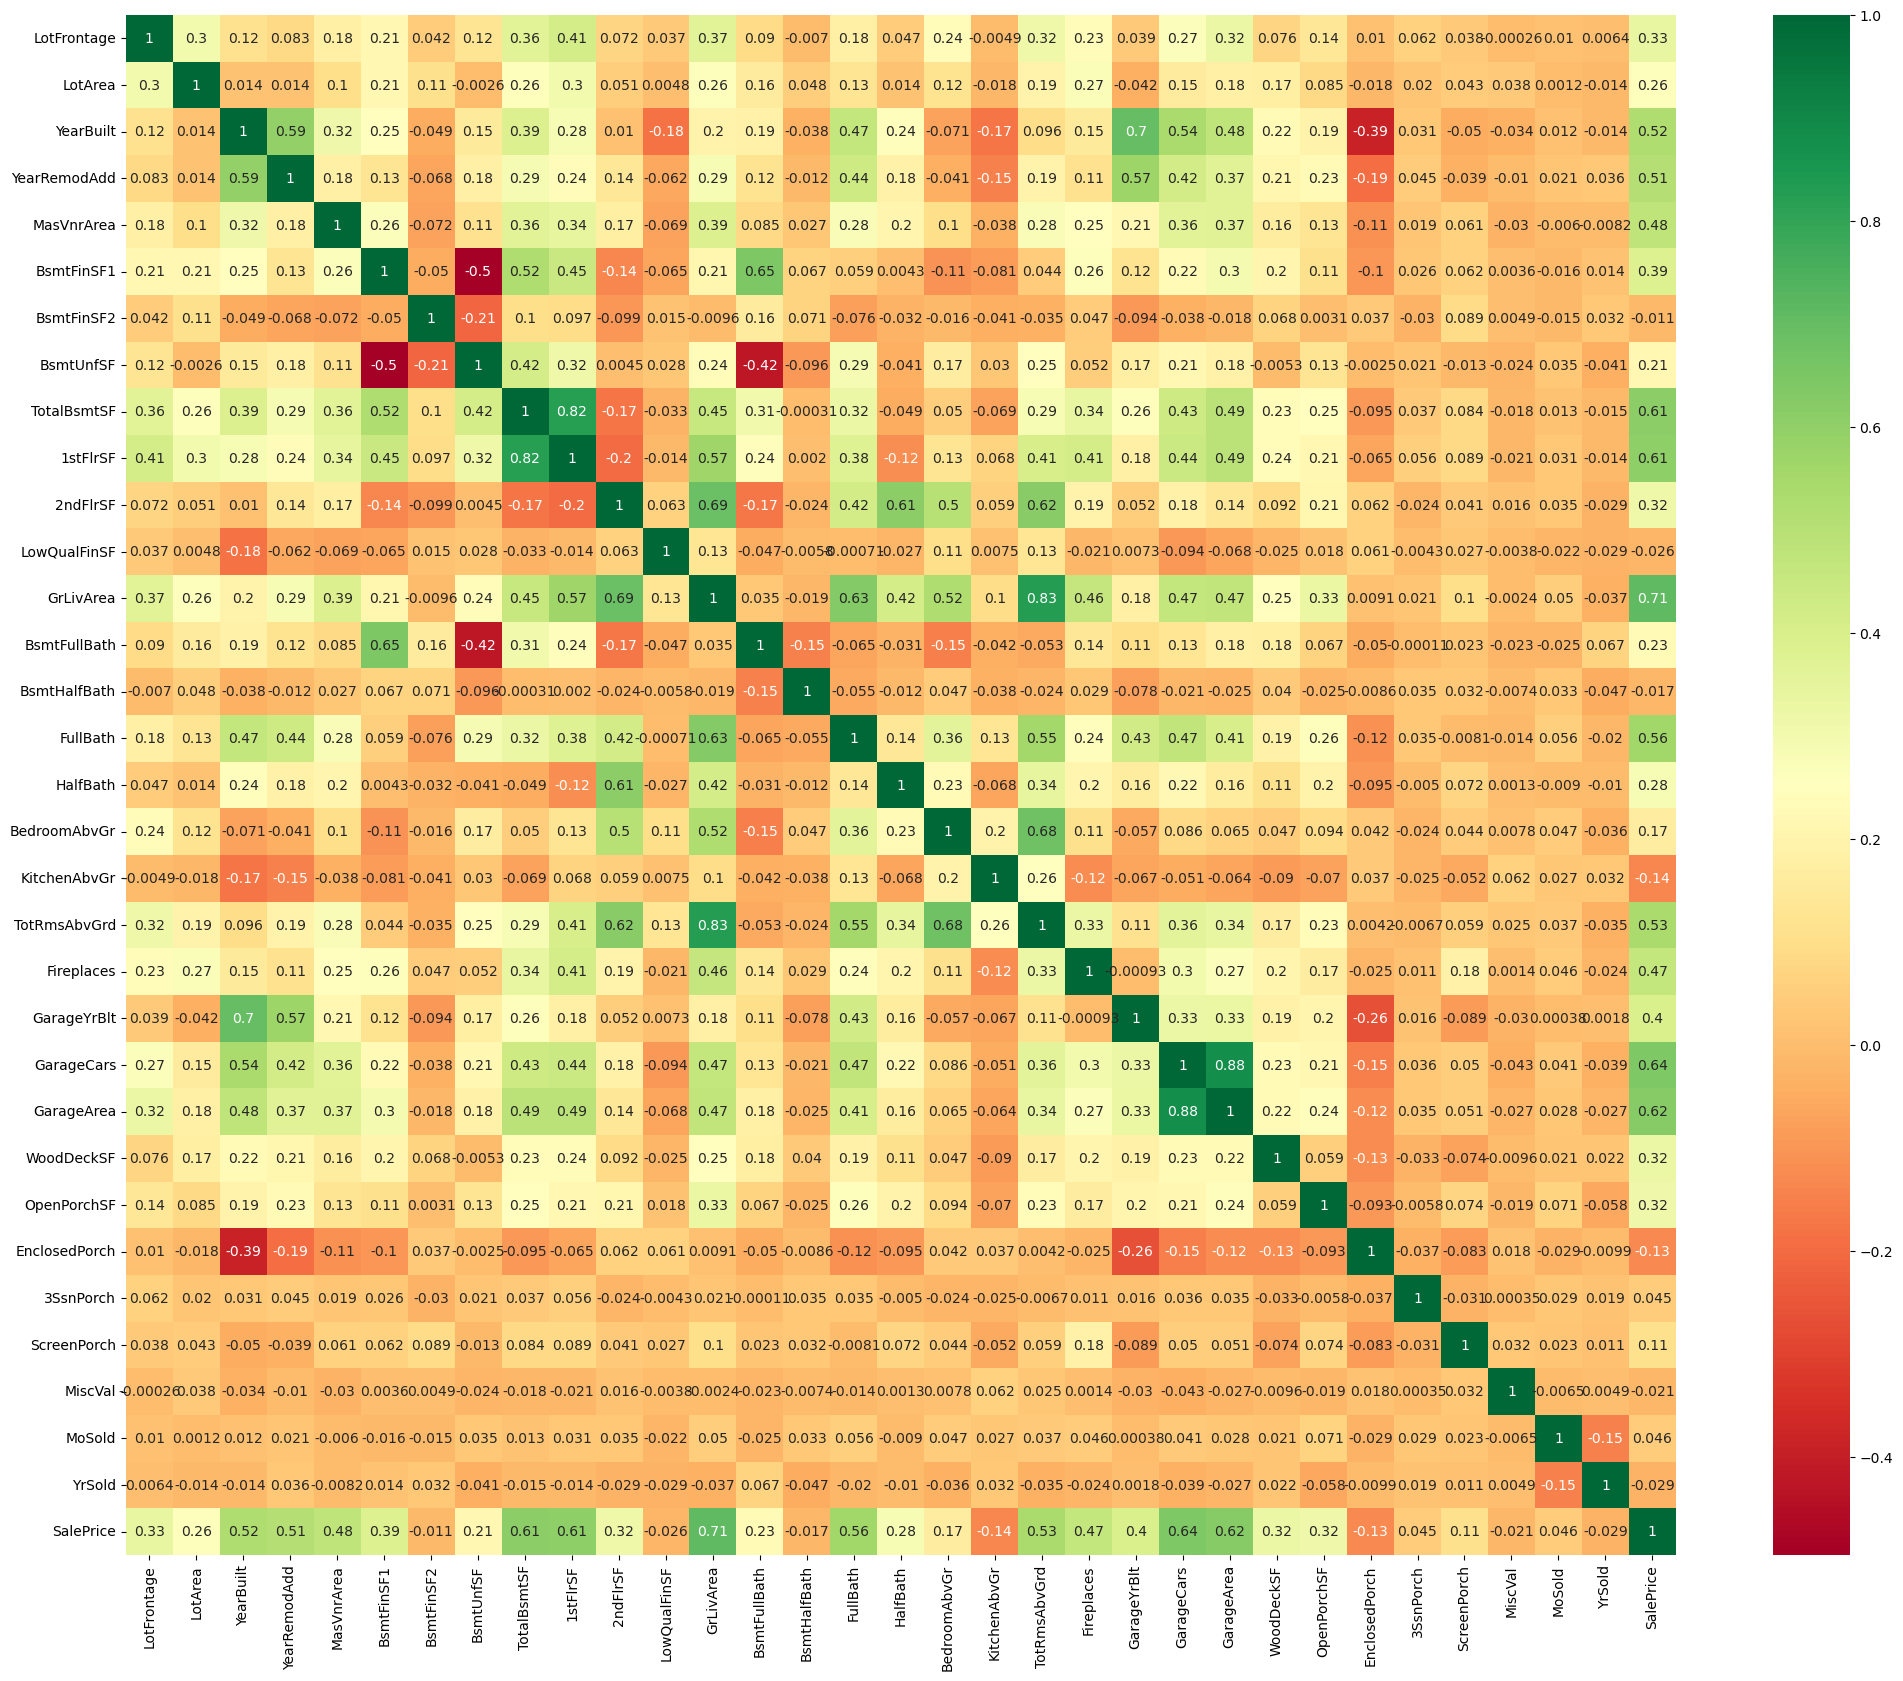

In [34]:
# Bivariate analysis
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='RdYlGn');

# observation:SalesPrice is highly correlated with OverallQual,GrliveArea
# GarageYrbuilt is correlated yearof built,few features correlated with each other

## Step 3:  Feature Engineering 

In [35]:
# new feature of year of bulding is added
df["year_of_bulding"] =df["YrSold"] - df["YearBuilt"] 
df["year_of_bulding"]


0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: year_of_bulding, Length: 1460, dtype: int64

In [36]:
# YearRemodAdd is modified 
df["YearRemodAdd"] =df["YrSold"] - df["YearRemodAdd"] 
df["YearRemodAdd"]


0        5
1       31
2        6
3       36
4        8
        ..
1455     7
1456    22
1457     4
1458    14
1459    43
Name: YearRemodAdd, Length: 1460, dtype: int64

In [37]:
# GarageYrBlt is modified 
df["GarageYrBlt"] =df["YrSold"] - df["GarageYrBlt"] 
df["GarageYrBlt"]


0        5.0
1       31.0
2        7.0
3        8.0
4        8.0
        ... 
1455     8.0
1456    32.0
1457    69.0
1458    60.0
1459    43.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [38]:
## Drop the two columns from which we created new one
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [39]:
df.shape

(1460, 74)

In [40]:
# outlier eliminating
# since we observated outlier in numerical features it has to be treated.
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

<AxesSubplot:>

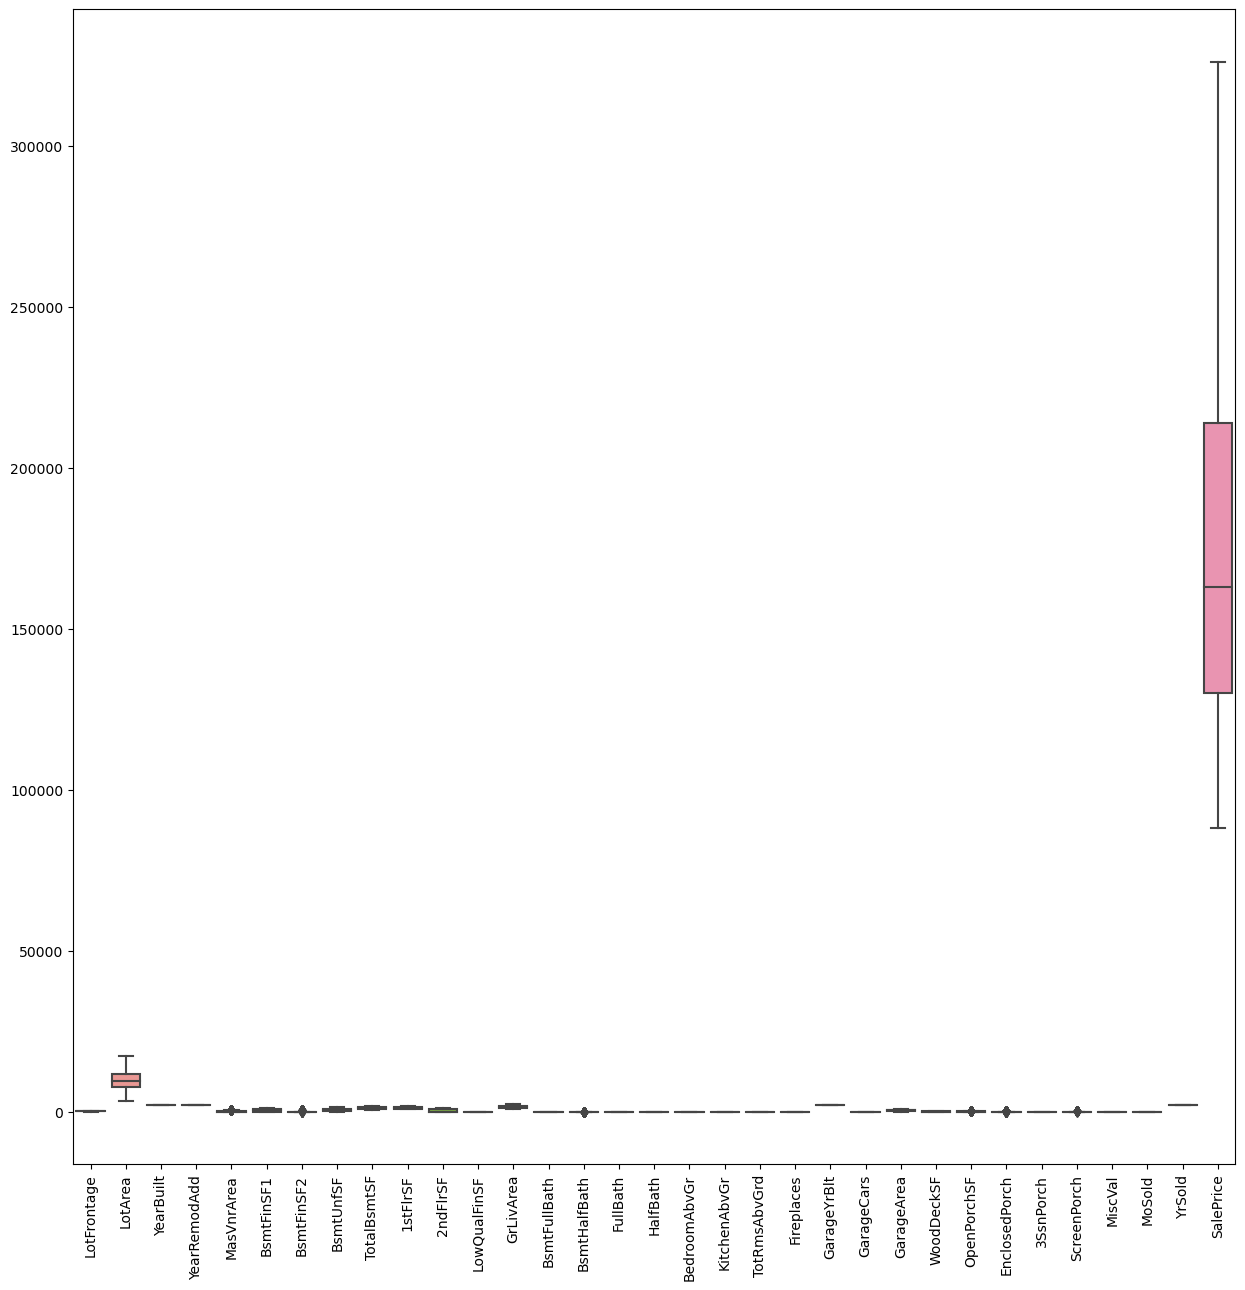

In [41]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num)

# observation:most of outlier is removed

In [42]:
## Separate the categorical and numerical features again from original dataframe
## (as we have added one feature and removed two from original data)
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include='object')

In [43]:
## One hot encoding the categorical columns
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [44]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
df = pd.concat([df_num, df_cat_encoded], axis=1)


## View the first few rows of our dataframe
df.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,5,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,31,0.0,978,0,284,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,6,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,36,0.0,216,0,540,756,961,756,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0


## Step 5: Model Building, Tuning and Evaluation 

In [45]:
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)

In [46]:
## View dimensions of train data
print(df_train.shape)
print(df_test.shape)

(1021, 274)
(438, 274)


In [47]:
## Create a list of numerical columns to be scaled
num_cols = list(df_test.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'year_of_bulding']

In [48]:
## Create a list of numerical columns to be scaled
num_cols = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'year_of_bulding']

In [49]:
# scalling train and test datset
scaler = StandardScaler()
# numerical_feature= ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF', 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','MoSold','SalePrice']
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])


In [50]:
df_train.describe()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.021000e+03,1.021000e+03,1.021000e+03,1.018000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.00000,1021.000000,1021.000000
mean,-1.538654e-16,-4.208191e-17,1.124359e-16,-1.729679e-16,-4.447416e-17,1.033018e-17,-7.676958e-17,2.472176e-16,-1.388594e-16,1.033018e-16,...,0.000979,0.002938,0.082272,0.000979,0.873653,0.003918,0.004897,0.01665,0.824682,0.083252
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000492e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.031296,0.054153,0.274914,0.031296,0.332403,0.062500,0.069842,0.12802,0.380425,0.276398
min,-2.133053e+00,-8.344536e-01,-1.161163e+00,-6.093405e-01,-9.714071e-01,-2.804832e-01,-1.281026e+00,-2.368486e+00,-2.145450e+00,-8.029400e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,-4.400208e-01,-2.803202e-01,-9.200316e-01,-6.093405e-01,-9.714071e-01,-2.804832e-01,-7.802376e-01,-5.912182e-01,-7.200477e-01,-8.029400e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
50%,-4.932111e-02,-1.017298e-01,-4.377684e-01,-6.093405e-01,-1.231365e-01,-2.804832e-01,-1.963582e-01,-1.463425e-01,-1.884111e-01,-8.029400e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3.847897e-01,8.365821e-02,9.125686e-01,3.749915e-01,6.033311e-01,-2.804832e-01,5.334911e-01,5.109111e-01,5.718036e-01,8.569771e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
max,1.054298e+01,1.805261e+01,1.780642e+00,7.369539e+00,1.130459e+01,7.172988e+00,3.964905e+00,1.129076e+01,9.047170e+00,3.879749e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [51]:
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [52]:
df_test.describe()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,438.000000,438.000000,438.000000,433.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000
mean,-0.037725,-0.067883,-0.018155,-0.030455,-0.019340,0.091884,-0.028049,-0.016741,-0.059908,-0.051780,...,0.009132,0.004566,0.086758,0.004566,0.853881,0.0,0.015982,0.006849,0.810502,0.091324
std,0.845156,0.501753,0.984493,1.155275,0.973107,1.207376,0.971080,0.934694,0.974684,0.965317,...,0.095235,0.067496,0.281802,0.067496,0.353629,0.0,0.125548,0.082571,0.392352,0.288399
min,-2.133053,-0.817592,-1.112937,-0.609341,-0.971407,-0.280483,-1.281026,-2.368486,-1.770479,-0.802940,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,-0.440021,-0.287118,-0.920032,-0.609341,-0.971407,-0.280483,-0.782483,-0.587865,-0.784255,-0.802940,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,-0.049321,-0.140838,-0.389542,-0.609341,-0.153587,-0.280483,-0.233412,-0.192171,-0.298848,-0.802940,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.341379,0.057042,0.767890,0.247607,0.532098,-0.280483,0.520017,0.559534,0.506954,0.847906,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,4.508842,5.297562,1.780642,8.654960,3.787608,9.467890,3.553944,4.798708,4.439653,3.442094,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [53]:
#remove rows with any values that are not finite
df_train = df_train[np.isfinite(df_train).all(1)]

In [54]:
#remove rows with any values that are not finite
df_test = df_test[np.isfinite(df_test).all(1)]

In [55]:
df_train.columns

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=274)

In [56]:
# Spliting the dependent and independent variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [57]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [58]:
X_train 

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,0.428201,-0.031106,0.719663,1.058234,-0.971407,-0.280483,1.647353,0.546680,1.316609,-0.802940,...,0,0,0,0,1,0,0,0,1,0
1452,-1.525298,-0.624789,-1.064711,-0.146125,0.218347,-0.280483,-1.281026,-1.145636,-0.250050,-0.802940,...,0,0,0,0,1,0,0,0,1,0
762,0.080912,-0.186479,-1.064711,-0.609341,-0.919206,-0.280483,0.362819,-0.678405,-1.041084,0.972627,...,0,0,0,0,0,0,0,0,1,0
932,0.601845,0.081010,-1.064711,1.139296,-0.971407,-0.280483,2.997013,1.890249,1.889338,-0.802940,...,0,0,0,0,1,0,0,0,1,0
435,-1.178009,-0.007535,-0.485995,-0.609341,-0.134012,1.994578,-1.123828,-0.582276,-0.879282,1.088277,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.428201,-0.101730,0.237400,-0.609341,1.429851,-0.280483,1.907853,3.274059,3.479111,-0.802940,...,0,0,0,0,1,0,0,0,1,0
1095,0.341379,-0.126713,-1.064711,-0.609341,-0.919206,-0.280483,1.615914,0.569036,0.371477,-0.802940,...,0,0,0,0,1,0,0,0,1,0
1130,-0.222965,-0.260281,1.732416,-0.609341,0.381476,-0.280483,-0.158181,0.139809,0.407433,0.677833,...,0,0,0,0,1,0,0,0,1,0
1294,-0.440021,-0.227794,-0.341316,-0.609341,-0.608173,-0.280483,0.284219,-0.436965,-0.784255,-0.802940,...,0,0,0,0,1,0,0,0,1,0


In [59]:
# Now using RFE lets try to to find the optimal number of feature
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,step=70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=70)

In [60]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [61]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
rfe_sel_columns

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'year_of_bulding',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_HLS',
 'Utilities_NoSeWa',
 'LotConfig_FR3',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Condition1_Norm',
 'Condition1_PosN',
 'Condition1_RRNe',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Cond

In [62]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]


In [63]:
lm1 =LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression()

In [64]:
y_train_predict = lm1.predict(X_train)

In [65]:
train_data_r2 = r2_score(y_train, y_train_predict)
print("Train data r2 score" ,train_data_r2)

Train data r2 score 0.9199939719866712


In [66]:
y_test_predict = lm1.predict(X_test)

In [67]:
test_data_r2 = r2_score(y_test, y_test_predict)
print("Test data r2 score" ,test_data_r2)

# observation r2 score for training and test data has huge difference which is condition for overfitting,
# low bais and high varaince conditiin

Test data r2 score -4.4696691486808986e+17


Lets try first with the Lasso regression model

In [68]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8722536899415614
0.8731211386107058


In [89]:
lm = Lasso(alpha=0.002)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8565957738009808
0.869567398145873


Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [69]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [70]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.068036,0.009653,0.005174,0.005403,0.001,{'alpha': 0.001},0.819625,0.914523,0.509408,0.864715,...,0.885056,0.870673,0.881934,0.872531,0.866761,0.909061,0.866780,0.871256,0.877307,0.012131
1,0.016582,0.003629,0.004028,0.005423,0.010,{'alpha': 0.01},0.771993,0.862160,0.518368,0.725043,...,0.804118,0.789386,0.781303,0.779472,0.776457,0.826878,0.776762,0.776763,0.787596,0.015562
2,0.010690,0.004444,0.004418,0.004845,0.100,{'alpha': 0.1},0.658671,0.648082,0.406201,0.692576,...,0.676115,0.651710,0.638088,0.649768,0.625785,0.719115,0.641532,0.643764,0.654652,0.024667
3,0.004881,0.006558,0.005840,0.005878,1.000,{'alpha': 1.0},-0.002291,-0.021011,-0.001097,-0.014368,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.011448,0.003371,0.005867,0.004074,5.000,{'alpha': 5.0},-0.002291,-0.021011,-0.001097,-0.014368,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


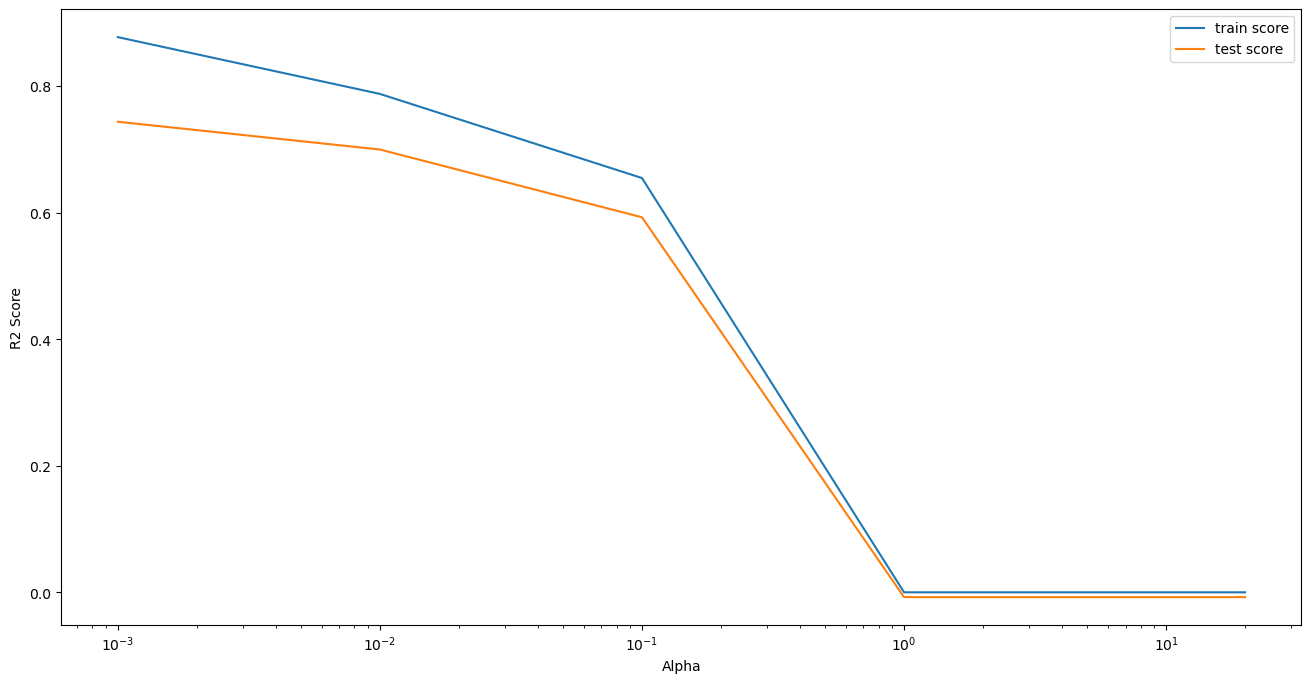

In [71]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#  As the value of alpha increases, we see a decrease in both train and test error.

In [72]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [73]:
# model is build with alpha =.001 in lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# r2 score of test and train data
r2_train = r2_score(y_true=y_train,y_pred=y_train_pred)
r2_test = r2_score(y_true=y_test,y_pred=y_test_pred)
print("r2 of train dat",r2_train )
print("r2 of test dat",r2_test)

# rss score of test and train data
rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_test_pred))
print("rss_train",rss_train )
print("rss_test",rss_test)


 ## Mean Squared Error of train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("mse_train",mse_train )
print("mse_test",mse_test)


# Root Mean Squared Error for train and test data
rmse_train = mse_train**0.5
rmse_test = mse_test**0.5
print("rmse_train",rmse_train )
print("rmse_test",rmse_test)

r2 of train dat 0.8722536899415614
r2 of test dat 0.8731211386107058
rss_train 130.3294281834576
rss_test 62.63038308109771
mse_train 0.12802497856921177
mse_test 0.14464291704641505
rmse_train 0.357805783308783
rmse_test 0.38031949338209714


In [74]:
lasso.intercept_

-0.23688268198284249

Now lets use the ridge regression

In [75]:
ridge = Ridge(alpha=.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9199896119181569
0.7385886826483898


In [90]:
ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8566778703572573
0.8640798510736553


As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [76]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0,10]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10]},
             return_train_score=True, scoring='r2', verbose=1)

In [77]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.011650,0.003330,0.008126,0.003732,0.001,{'alpha': 0.001},0.153535,0.910290,0.455928,0.908725,...,0.934300,0.918835,0.931337,0.922392,0.915835,0.918717,0.917112,0.920455,0.922487,0.005952
1,0.012670,0.004123,0.005307,0.003518,0.010,{'alpha': 0.01},0.257516,0.909912,0.470091,0.907613,...,0.933842,0.918430,0.930984,0.921972,0.915405,0.918702,0.916684,0.920042,0.922121,0.005936
2,0.010878,0.004183,0.006953,0.003596,0.100,{'alpha': 0.1},0.654333,0.904488,0.517987,0.894890,...,0.921731,0.907460,0.920054,0.910477,0.903972,0.918353,0.905152,0.908706,0.911982,0.006208
3,0.010109,0.003176,0.006425,0.003213,0.200,{'alpha': 0.2},0.750354,0.902466,0.526700,0.886233,...,0.912803,0.899148,0.910572,0.901683,0.895425,0.917886,0.896456,0.900008,0.904080,0.007276
4,0.010420,0.003800,0.004758,0.003887,0.500,{'alpha': 0.5},0.805003,0.904196,0.527917,0.873782,...,0.901553,0.888140,0.896351,0.889986,0.884166,0.916173,0.885012,0.888431,0.893306,0.009241


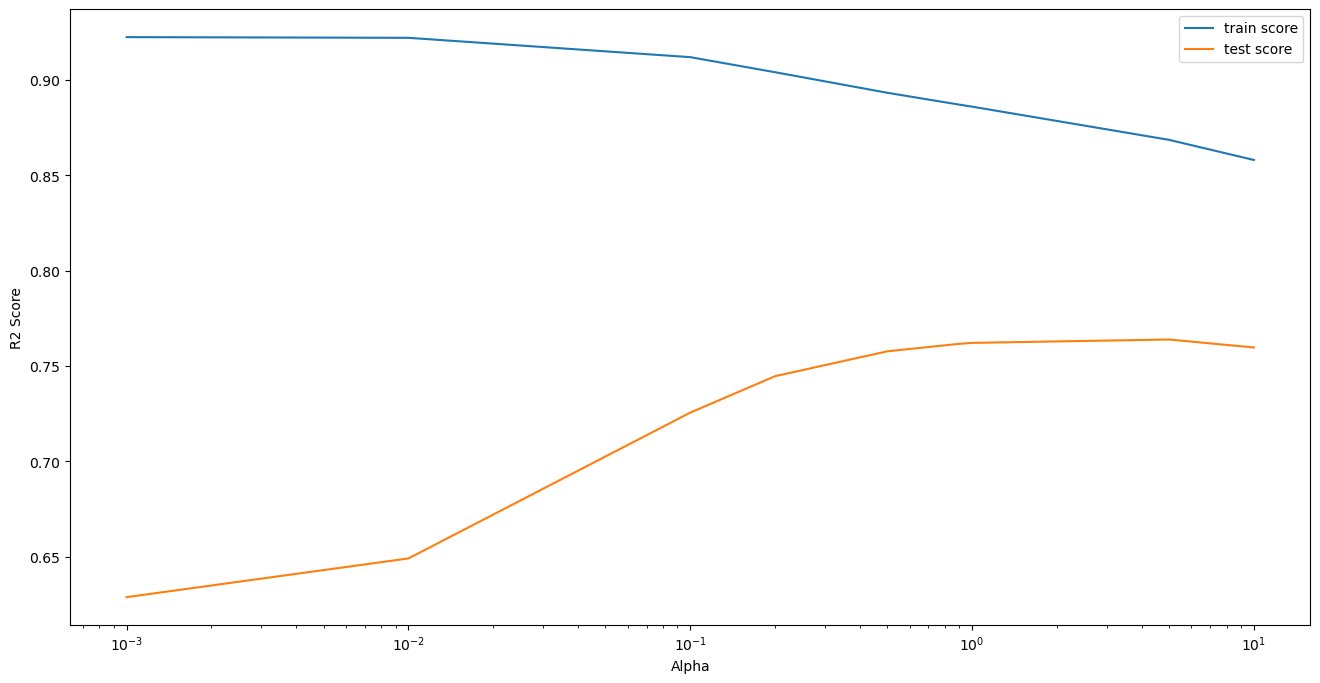

In [78]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [79]:
#  Checking the best parameter(Alpha value)
model_cv.best_params_


{'alpha': 5.0}

In [80]:
ridge = Ridge(alpha =5.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8665025245518091
0.8671031987123535


In [81]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']


In [82]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
61,LandSlope_Mod,0.657644
62,LandSlope_Sev,0.586785
79,Neighborhood_OldTown,0.401953
36,MSSubClass_70,0.385297
70,Neighborhood_Gilbert,0.368244
42,MSSubClass_160,0.326610
100,Condition2_RRAn,0.293398
60,LotConfig_Inside,0.288629
87,Condition1_Feedr,0.279049
81,Neighborhood_Sawyer,0.260455


In [83]:
# Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas

""
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
...
SaleType_Con
SaleType_ConLD
SaleType_ConLI
SaleCondition_AdjLand


In [84]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [85]:
## View the betas/coefficients
betas 

# observation:few coefficient of feature in Lasso regression is 0 hence it involves in feature elimination 

,Ridge,Lasso
BsmtFinSF1,0.032188,0.032650
BsmtFinSF2,0.016621,0.014814
BsmtUnfSF,-0.025513,-0.021392
TotalBsmtSF,0.013304,0.000000
1stFlrSF,0.088556,0.000000
...,...,...
SaleType_Con,0.119749,0.000000
SaleType_ConLD,0.044338,0.000000
SaleType_ConLI,-0.012074,-0.000000
SaleCondition_AdjLand,0.133173,0.012431


In [86]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9           0.657644
OverallQual_10          0.586785
RoofMatl_WdShngl        0.401953
Neighborhood_NoRidge    0.385297
OverallCond_9           0.368244
Neighborhood_StoneBr    0.326610
BsmtExposure_Gd         0.293398
OverallQual_8           0.288629
Exterior2nd_ImStucc     0.279049
Exterior1st_BrkFace     0.260455
Name: Ridge, dtype: float64

In [91]:
## View the top 10 coefficients of Lasso regression in descending order
betas['Lasso'].sort_values(ascending=False)[:30]

OverallQual_10          1.147259
OverallQual_9           0.823510
RoofMatl_WdShngl        0.756116
OverallCond_9           0.456114
RoofMatl_CompShg        0.446628
Neighborhood_NoRidge    0.404336
Neighborhood_StoneBr    0.362257
GrLivArea               0.353560
RoofMatl_Tar&Grv        0.342216
OverallQual_8           0.333884
BsmtExposure_Gd         0.293254
Exterior1st_BrkFace     0.282684
Exterior2nd_ImStucc     0.254357
OverallCond_8           0.196782
LandSlope_Sev           0.178768
RoofStyle_Mansard       0.177237
LandContour_HLS         0.174634
OverallCond_7           0.170940
MSZoning_FV             0.158449
Condition1_Norm         0.155368
MSSubClass_70           0.151630
HouseStyle_1Story       0.143882
RoofMatl_WdShake        0.128929
FireplaceQu_TA          0.127713
FireplaceQu_Gd          0.125077
Exterior1st_CemntBd     0.124459
MasVnrType_Stone        0.118355
2ndFlrSF                0.103049
MSZoning_RL             0.095667
OverallCond_6           0.091305
Name: Lass

After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso will penalize more on the dataset and can also help in feature elemination i am goint to consider that as my final model.

# Final Model

In [88]:
# model is build with alpha =.001 in lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# r2 score of test and train data
r2_train = r2_score(y_true=y_train,y_pred=y_train_pred)
r2_test = r2_score(y_true=y_test,y_pred=y_test_pred)
print("r2 of train dat",r2_train )
print("r2 of test dat",r2_test)

# rss score of test and train data
rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_test_pred))
print("rss_train",rss_train )
print("rss_test",rss_test)


 ## Mean Squared Error of train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("mse_train",mse_train )
print("mse_test",mse_test)


# Root Mean Squared Error for train and test data
rmse_train = mse_train**0.5
rmse_test = mse_test**0.5
print("rmse_train",rmse_train )
print("rmse_test",rmse_test)

r2 of train dat 0.8722536899415614
r2 of test dat 0.8731211386107058
rss_train 130.3294281834576
rss_test 62.63038308109771
mse_train 0.12802497856921177
mse_test 0.14464291704641505
rmse_train 0.357805783308783
rmse_test 0.38031949338209714


# Conclusion:

### After compairing both the model we can see that the below Features are best explaining the DataSet

OverallQual :Excellent,good quality materials used for house is good predictable variable.

RoofMatl    :roof material such as Standard (Composite) Shingle ,Wood Shakes are good predictable variable.

Neighborhood:Neighborhood with Northridge ,Stone Brook are good predictable variable.

GrLivArea,BsmtExposure.  


### Best alpha value for Lasso : {'alpha': 0.001}



### Best alpha value for Ridge : {'alpha': 5.0}